In [148]:
# ============================================
# AVANCE #3 - ANÁLISIS INTEGRADO (CLIENTES + YELP)
# InsightReach - Facundo Acosta - Científico de Datos Junior
# ============================================

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 70)
print("ANÁLISIS INTEGRADO: CLIENTES MIAMI + NEGOCIOS YELP")
print("=" * 70)

ANÁLISIS INTEGRADO: CLIENTES MIAMI + NEGOCIOS YELP


## 1. Carga y Preparación de Datos

### Objetivo:
Integrar los datasets de clientes de Miami (Avance #1) y negocios de Yelp (Avance #2) para realizar un análisis completo del mercado gastronómico de Miami.

** Es importante tener en cuenta que, al trabajar con un dataframe de 200 locales de la ciudad de Miami y compararlo con la base completa de clientes filtrada por ciudad de Miami (3.186 registros), el análisis presenta un sesgo debido a la diferencia en el tamaño y representatividad de las muestras. **

In [150]:
# =============================================================================
# 1. CARGANDO DATOS DESDE ARCHIVOS CSV
# =============================================================================
print("\n1. CARGANDO DATOS DESDE ARCHIVOS CSV")
print("-" * 50)

try:
    # Cargar datos de clientes de Miami (exportados desde Avance 1)
    df_clientes_miami = pd.read_csv('clientes_miami_limpio.csv')
    print("✅ Datos de clientes de Miami cargados correctamente")
    print(f"   • Registros: {len(df_clientes_miami)} clientes")
    print(f"   • Columnas: {len(df_clientes_miami.columns)} variables")
    
    # Cargar datos de Yelp Miami (exportados desde Avance 2)
    df_yelp_miami = pd.read_csv('yelp_miami_limpio.csv')
    print("✅ Datos Yelp de Miami cargados correctamente")
    print(f"   • Negocios: {len(df_yelp_miami)} establecimientos")
    print(f"   • Columnas: {len(df_yelp_miami.columns)} variables")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("   Asegúrate de haber ejecutado los Avances 1 y 2 y guardado los CSV")
    raise

# Mostrar primeras filas de cada dataset
print("\n📋 Vista previa datos clientes:")
print(df_clientes_miami[['estrato_socioeconomico', 'preferencias_alimenticias', 'promedio_gasto_comida']].head())

print("\n📋 Vista previa datos Yelp:")
print(df_yelp_miami[['nombre', 'categorias', 'calificacion', 'precio_nivel']].head())


1. CARGANDO DATOS DESDE ARCHIVOS CSV
--------------------------------------------------
✅ Datos de clientes de Miami cargados correctamente
   • Registros: 3186 clientes
   • Columnas: 17 variables
✅ Datos Yelp de Miami cargados correctamente
   • Negocios: 200 establecimientos
   • Columnas: 23 variables

📋 Vista previa datos clientes:
  estrato_socioeconomico preferencias_alimenticias  promedio_gasto_comida
0                   Alto               Vegetariano                  67.51
1               Muy Alto               Vegetariano                  26.60
2               Muy Alto                  Mariscos                  28.43
3                   Alto                  Mariscos                  43.00
4               Muy Alto                    Carnes                 119.85

📋 Vista previa datos Yelp:
                            nombre                                categorias  \
0                      Salty Flame  Asian Fusion, Steakhouses, Cocktail Bars   
1  Old's Havana Cuban Bar & 

## 2. Análisis de Preferencias vs Oferta

### Objetivo:
Comprender la distribución de preferencias alimenticias de los clientes y compararla con la oferta actual de restaurantes en Miami.

In [151]:
# =============================================================================
# 2. PREFERENCIAS CLIENTES vs OFERTA RESTAURANTES
# =============================================================================
print("\n2. PREFERENCIAS CLIENTES vs OFERTA RESTAURANTES")
print("-" * 50)

# Preferencias de clientes en Miami
print("📊 PREFERENCIAS ALIMENTICIAS DE CLIENTES EN MIAMI:")
preferencias_clientes = df_clientes_miami['preferencias_alimenticias'].value_counts()
for pref, count in preferencias_clientes.items():
    porcentaje = (count / len(df_clientes_miami)) * 100
    print(f"   🍽️  {pref}: {count} clientes ({porcentaje:.1f}%)")

# Oferta de restaurantes por categoría en Yelp
print("\n🏪 OFERTA DE RESTAURANTES EN YELP POR CATEGORÍA PRINCIPAL:")
# Extraer categorías principales de los negocios
categorias_principales = []
for categorias in df_yelp_miami['categorias']:
    if pd.notna(categorias):
        # Tomar la primera categoría como principal
        categoria_principal = categorias.split(',')[0].strip()
        categorias_principales.append(categoria_principal)

df_yelp_miami['categoria_principal'] = categorias_principales

ofertas_restaurantes = df_yelp_miami['categoria_principal'].value_counts()
print("Top 10 categorías de restaurantes en Yelp:")
for categoria, count in ofertas_restaurantes.head(10).items():
    porcentaje = (count / len(df_yelp_miami)) * 100
    print(f"   🏷️  {categoria}: {count} negocios ({porcentaje:.1f}%)")


2. PREFERENCIAS CLIENTES vs OFERTA RESTAURANTES
--------------------------------------------------
📊 PREFERENCIAS ALIMENTICIAS DE CLIENTES EN MIAMI:
   🍽️  Mariscos: 965 clientes (30.3%)
   🍽️  Vegetariano: 728 clientes (22.8%)
   🍽️  Carnes: 511 clientes (16.0%)
   🍽️  Vegano: 382 clientes (12.0%)
   🍽️  Pescado: 307 clientes (9.6%)
   🍽️  Otro: 293 clientes (9.2%)

🏪 OFERTA DE RESTAURANTES EN YELP POR CATEGORÍA PRINCIPAL:
Top 10 categorías de restaurantes en Yelp:
   🏷️  Italian: 15 negocios (7.5%)
   🏷️  Cuban: 11 negocios (5.5%)
   🏷️  New American: 11 negocios (5.5%)
   🏷️  Mediterranean: 9 negocios (4.5%)
   🏷️  Steakhouses: 8 negocios (4.0%)
   🏷️  Latin American: 8 negocios (4.0%)
   🏷️  Seafood: 7 negocios (3.5%)
   🏷️  Peruvian: 7 negocios (3.5%)
   🏷️  Asian Fusion: 5 negocios (2.5%)
   🏷️  Mexican: 5 negocios (2.5%)


## 3. Mapeo y Correspondencia entre Preferencias y Oferta

### Objetivo:
Establecer una relación entre las categorías de restaurantes de Yelp y las preferencias alimenticias de los clientes para identificar correspondencias y brechas.

In [152]:
# =============================================================================
# 3. ANÁLISIS DE CORRESPONDENCIA PREFERENCIAS-OFERTA
# =============================================================================
print("\n3. ANÁLISIS DE CORRESPONDENCIA PREFERENCIAS-OFERTA")
print("-" * 50)

# Mapeo de categorías Yelp a preferencias clientes
mapeo_categorias = {
    'Cuban': 'Carnes',
    'Italian': 'Carnes', 
    'Steakhouses': 'Carnes',
    'Seafood': 'Mariscos',
    'Mediterranean': 'Vegetariano',
    'Vegetarian': 'Vegetariano',
    'Vegan': 'Vegetariano',
    'Asian Fusion': 'Variado',
    'Latin American': 'Carnes',
    'New American': 'Carnes',
    'Mexican': 'Carnes',
    'American': 'Carnes',
    'Bars': 'Variado',
    'Coffee': 'Variado',
    'Bakeries': 'Variado'
}

# Clasificar negocios Yelp según preferencias
def clasificar_preferencia(categoria_principal):
    return mapeo_categorias.get(categoria_principal, 'Variado')

df_yelp_miami['preferencia_correspondiente'] = df_yelp_miami['categoria_principal'].apply(clasificar_preferencia)

print("📈 CORRESPONDENCIA ENTRE OFERTA YELP Y PREFERENCIAS CLIENTES:")
correspondencia = df_yelp_miami['preferencia_correspondiente'].value_counts()
for pref, count in correspondencia.items():
    porcentaje = (count / len(df_yelp_miami)) * 100
    print(f"   ✅ {pref}: {count} negocios ({porcentaje:.1f}%)")

# Estadísticas de calidad del mapeo
mapeo_exitoso = sum(1 for cat in df_yelp_miami['categoria_principal'] if cat in mapeo_categorias)
porcentaje_mapeo = (mapeo_exitoso / len(df_yelp_miami)) * 100
print(f"\n📊 Efectividad del mapeo: {porcentaje_mapeo:.1f}% de categorías mapeadas")


3. ANÁLISIS DE CORRESPONDENCIA PREFERENCIAS-OFERTA
--------------------------------------------------
📈 CORRESPONDENCIA ENTRE OFERTA YELP Y PREFERENCIAS CLIENTES:
   ✅ Variado: 122 negocios (61.0%)
   ✅ Carnes: 61 negocios (30.5%)
   ✅ Vegetariano: 10 negocios (5.0%)
   ✅ Mariscos: 7 negocios (3.5%)

📊 Efectividad del mapeo: 46.0% de categorías mapeadas


## 4. Análisis de Brecha Oferta-Demanda

### Objetivo:
Cuantificar la brecha entre la demanda de los clientes y la oferta disponible de restaurantes para identificar oportunidades de mercado.

In [153]:
# =============================================================================
# 4. BRECHA ENTRE OFERTA Y DEMANDA ALIMENTICIA
# =============================================================================
print("\n4. BRECHA ENTRE OFERTA Y DEMANDA ALIMENTICIA")
print("-" * 50)

# Crear DataFrame comparativo
df_comparativo = pd.DataFrame({
    'Demanda_Clientes': preferencias_clientes,
    'Oferta_Yelp': correspondencia
}).fillna(0)

# Calcular porcentajes y brecha
df_comparativo['Demanda_%'] = (df_comparativo['Demanda_Clientes'] / df_comparativo['Demanda_Clientes'].sum()) * 100
df_comparativo['Oferta_%'] = (df_comparativo['Oferta_Yelp'] / df_comparativo['Oferta_Yelp'].sum()) * 100
df_comparativo['Brecha'] = df_comparativo['Demanda_%'] - df_comparativo['Oferta_%']
df_comparativo['Ratio_Demanda_Oferta'] = df_comparativo['Demanda_Clientes'] / df_comparativo['Oferta_Yelp']

print("📊 ANÁLISIS COMPARATIVO OFERTA-DEMANDA:")
print(df_comparativo.round(2))

# Identificar brechas significativas
brechas_significativas = df_comparativo[abs(df_comparativo['Brecha']) > 5]
if not brechas_significativas.empty:
    print("\n⚠️  BRECHAS SIGNIFICATIVAS IDENTIFICADAS:")
    for pref, row in brechas_significativas.iterrows():
        print(f"   • {pref}: Brecha de {row['Brecha']:+.1f}%")


4. BRECHA ENTRE OFERTA Y DEMANDA ALIMENTICIA
--------------------------------------------------
📊 ANÁLISIS COMPARATIVO OFERTA-DEMANDA:
             Demanda_Clientes  Oferta_Yelp  Demanda_%  Oferta_%  Brecha  \
Carnes                  511.0         61.0      16.04      30.5  -14.46   
Mariscos                965.0          7.0      30.29       3.5   26.79   
Otro                    293.0          0.0       9.20       0.0    9.20   
Pescado                 307.0          0.0       9.64       0.0    9.64   
Variado                   0.0        122.0       0.00      61.0  -61.00   
Vegano                  382.0          0.0      11.99       0.0   11.99   
Vegetariano             728.0         10.0      22.85       5.0   17.85   

             Ratio_Demanda_Oferta  
Carnes                       8.38  
Mariscos                   137.86  
Otro                          inf  
Pescado                       inf  
Variado                      0.00  
Vegano                        inf  
Vegetariano


5. VISUALIZACIÓN DE BRECHA OFERTA-DEMANDA
--------------------------------------------------
🔍 Verificación de datos para visualización:
Filas en df_comparativo: 7
Valores NaN en Demanda_%: 0
Valores NaN en Oferta_%: 0
Valores infinitos en datos: 0
✅ Datos preparados para visualización


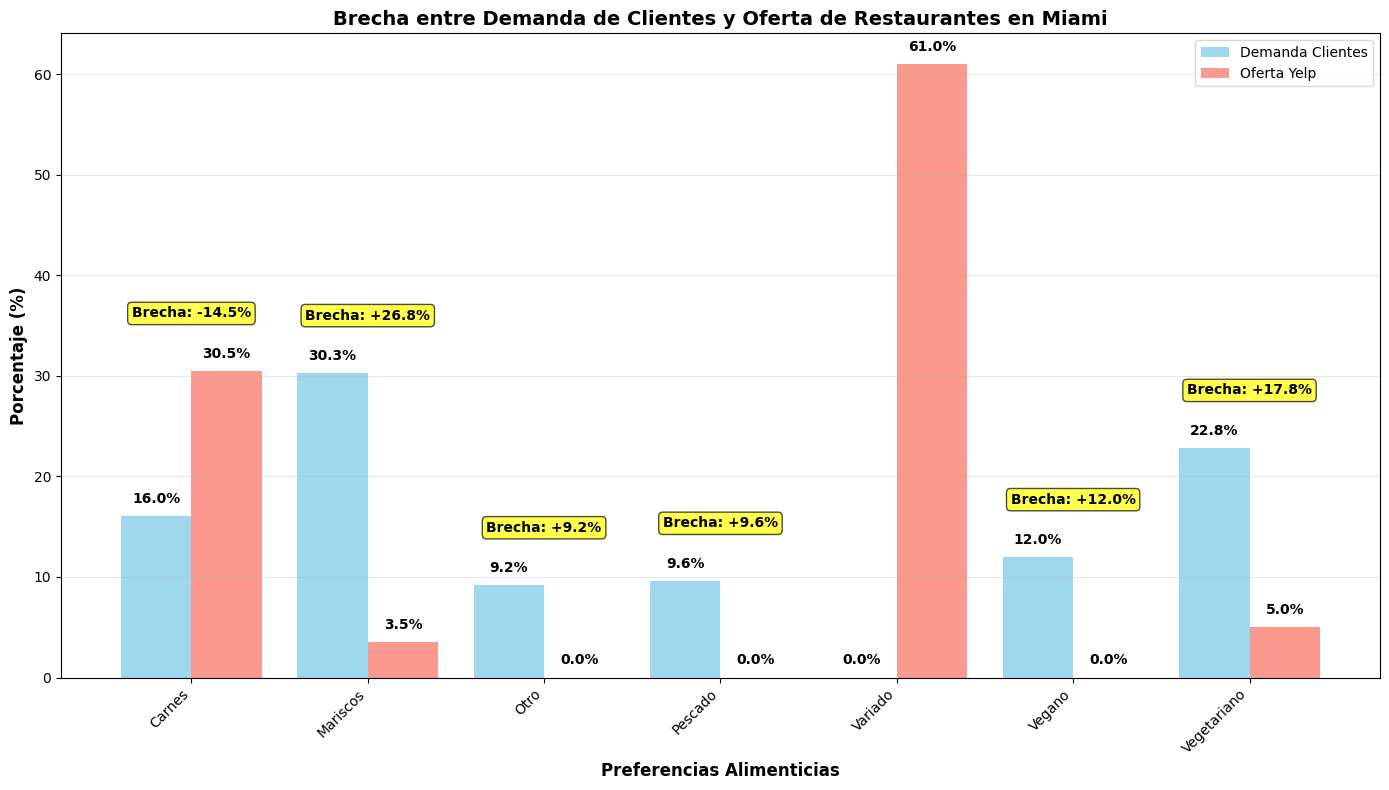

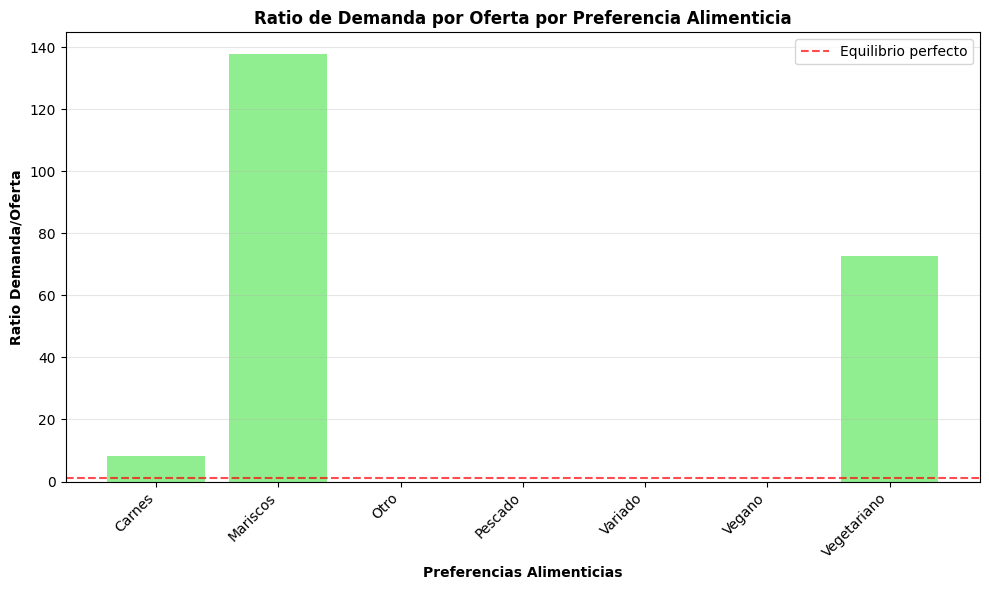

✅ Visualización completada


In [154]:
# =============================================================================
# 5. VISUALIZACIÓN DE LA BRECHA OFERTA-DEMANDA
# =============================================================================
print("\n5. VISUALIZACIÓN DE BRECHA OFERTA-DEMANDA")
print("-" * 50)

# 🔍 VALIDACIÓN PREVIA: Verificar la calidad de los datos antes de graficar
print("🔍 Verificación de datos para visualización:")
print(f"Filas en df_comparativo: {len(df_comparativo)}")
print(f"Valores NaN en Demanda_%: {df_comparativo['Demanda_%'].isna().sum()}")
print(f"Valores NaN en Oferta_%: {df_comparativo['Oferta_%'].isna().sum()}")
print(f"Valores infinitos en datos: {np.isinf(df_comparativo[['Demanda_%', 'Oferta_%']]).sum().sum()}")

# Limpiar datos antes de graficar
df_viz = df_comparativo.copy()

# Reemplazar NaN e infinitos con 0 para evitar problemas de visualización
df_viz = df_viz.fillna(0)
df_viz = df_viz.replace([np.inf, -np.inf], 0)

print("✅ Datos preparados para visualización")

# Verificar que tenemos datos para graficar
if len(df_viz) == 0:
    print("❌ No hay datos para graficar")
else:
    # GRÁFICO 1: Comparación Demanda vs Oferta
    plt.figure(figsize=(14, 8))
    
    categorias = df_viz.index
    x = range(len(categorias))
    
    # Crear las barras
    bars1 = plt.bar([i - 0.2 for i in x], df_viz['Demanda_%'], width=0.4, 
                    label='Demanda Clientes', alpha=0.8, color='skyblue')
    bars2 = plt.bar([i + 0.2 for i in x], df_viz['Oferta_%'], width=0.4, 
                    label='Oferta Yelp', alpha=0.8, color='salmon')
    
    plt.xlabel('Preferencias Alimenticias', fontsize=12, fontweight='bold')
    plt.ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
    plt.title('Brecha entre Demanda de Clientes y Oferta de Restaurantes en Miami', 
              fontsize=14, fontweight='bold')
    plt.xticks(x, categorias, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # Añadir valores en las barras (solo si los valores son válidos)
    for i, (demanda, oferta) in enumerate(zip(df_viz['Demanda_%'], df_viz['Oferta_%'])):
        if not (np.isnan(demanda) or np.isnan(oferta)):
            plt.text(i - 0.2, demanda + 1, f'{demanda:.1f}%', ha='center', va='bottom', fontweight='bold')
            plt.text(i + 0.2, oferta + 1, f'{oferta:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # Destacar brechas significativas (solo si la columna existe y tiene valores válidos)
    if 'Brecha' in df_viz.columns:
        for i, (pref, row) in enumerate(df_viz.iterrows()):
            if not np.isnan(row['Brecha']) and abs(row['Brecha']) > 5:
                plt.annotate(f"Brecha: {row['Brecha']:+.1f}%", 
                            xy=(i, max(row['Demanda_%'], row['Oferta_%']) + 5),
                            ha='center', va='bottom', fontweight='bold',
                            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    # GRÁFICO 2: Ratio Demanda/Oferta (solo si la columna existe)
    if 'Ratio_Demanda_Oferta' in df_viz.columns:
        # Verificar que no hay valores problemáticos en el ratio
        ratios_validos = df_viz['Ratio_Demanda_Oferta'].replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(ratios_validos) > 0:
            plt.figure(figsize=(10, 6))
            
            # Usar solo los índices con ratios válidos
            indices_validos = ratios_validos.index
            valores_ratios = ratios_validos.values
            
            plt.bar(indices_validos, valores_ratios, color='lightgreen')
            plt.xlabel('Preferencias Alimenticias', fontweight='bold')
            plt.ylabel('Ratio Demanda/Oferta', fontweight='bold')
            plt.title('Ratio de Demanda por Oferta por Preferencia Alimenticia', fontweight='bold')
            plt.xticks(rotation=45, ha='right')
            plt.grid(axis='y', alpha=0.3)
            
            # Añadir línea de referencia en y=1 (equilibrio perfecto)
            plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Equilibrio perfecto')
            plt.legend()
            
            plt.tight_layout()
            plt.show()
        else:
            print("⚠️ No hay ratios válidos para graficar")
    else:
        print("⚠️ Columna 'Ratio_Demanda_Oferta' no encontrada")

print("✅ Visualización completada")

** Es importante tener en cuenta que, al trabajar con un dataframe de 200 locales de la ciudad de Miami y compararlo con la base completa de clientes filtrada por ciudad de Miami (3.186 registros), el análisis presenta un sesgo debido a la diferencia en el tamaño y representatividad de las muestras. **

## 6. Análisis por Estrato Socioeconómico

### Objetivo:
Identificar patrones de preferencias alimenticias y capacidad de gasto según el estrato socioeconómico para segmentación precisa.


6. ANÁLISIS POR ESTRATO SOCIOECONÓMICO
--------------------------------------------------
📊 PREFERENCIAS ALIMENTICIAS POR ESTRATO SOCIOECONÓMICO:
preferencias_alimenticias  Carnes  Mariscos  Otro  Pescado  Vegano  \
estrato_socioeconomico                                               
Alto                         17.0      29.2   8.7      9.6    11.6   
Bajo                         16.0      32.4   9.7     10.6     8.5   
Medio                        15.3      30.5   8.3      9.8    14.3   
Muy Alto                     15.4      30.5  10.5      9.0    12.3   

preferencias_alimenticias  Vegetariano  
estrato_socioeconomico                  
Alto                              24.0  
Bajo                              22.9  
Medio                             21.7  
Muy Alto                          22.3  


<Figure size 1200x800 with 0 Axes>

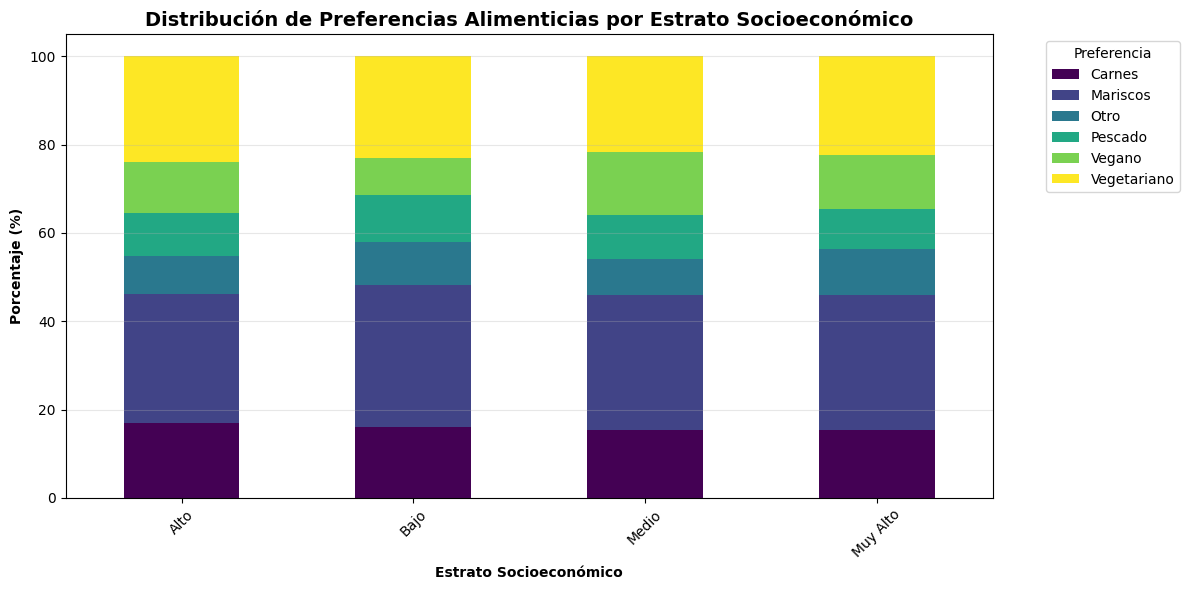


💰 CAPACIDAD DE GASTO POR ESTRATO SOCIOECONÓMICO:
                       promedio_gasto_comida               ingresos_mensuales
                                        mean median    std               mean
estrato_socioeconomico                                                       
Alto                                   40.10  40.25  16.99            6198.78
Bajo                                   13.34  14.88   8.20            1193.47
Medio                                  24.89  25.04   8.58            2557.81
Muy Alto                               68.77  67.96  34.88           13660.96


In [155]:
# =============================================================================
# 6. ANÁLISIS POR ESTRATO SOCIOECONÓMICO
# =============================================================================
print("\n6. ANÁLISIS POR ESTRATO SOCIOECONÓMICO")
print("-" * 50)

# Preferencias por estrato en Miami
print("📊 PREFERENCIAS ALIMENTICIAS POR ESTRATO SOCIOECONÓMICO:")
pref_por_estrato = pd.crosstab(df_clientes_miami['estrato_socioeconomico'], 
                              df_clientes_miami['preferencias_alimenticias'],
                              normalize='index') * 100

print(pref_por_estrato.round(1))

# Visualización de preferencias por estrato
plt.figure(figsize=(12, 8))
pref_por_estrato.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de Preferencias Alimenticias por Estrato Socioeconómico', 
          fontsize=14, fontweight='bold')
plt.xlabel('Estrato Socioeconómico', fontweight='bold')
plt.ylabel('Porcentaje (%)', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Preferencia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de poder adquisitivo por estrato
print("\n💰 CAPACIDAD DE GASTO POR ESTRATO SOCIOECONÓMICO:")
gasto_por_estrato = df_clientes_miami.groupby('estrato_socioeconomico').agg({
    'promedio_gasto_comida': ['mean', 'median', 'std'],
    'ingresos_mensuales': 'mean'
}).round(2)

print(gasto_por_estrato)

## 7. Análisis de Precios y Gasto Promedio

### Objetivo:
Comparar el gasto promedio de los clientes con los niveles de precio de los restaurantes para identificar compatibilidades y oportunidades.

In [156]:
# =============================================================================
# 7. GASTO CLIENTES vs PRECIO RESTAURANTES
# =============================================================================
print("\n7. GASTO CLIENTES vs PRECIO RESTAURANTES")
print("-" * 50)

# Gasto promedio por estrato
print("💰 GASTO PROMEDIO EN COMIDA POR ESTRATO EN MIAMI:")
gasto_por_estrato = df_clientes_miami.groupby('estrato_socioeconomico')['promedio_gasto_comida'].mean()
print(gasto_por_estrato.round(2))

# Distribución de precios en Yelp
print("\n🏷️  DISTRIBUCIÓN DE PRECIOS EN RESTAURANTES YELP:")
precios_yelp = df_yelp_miami['precio_nivel'].value_counts().sort_index()
print(precios_yelp)

# Mapeo de precios a valores numéricos para análisis
precio_a_valor = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4, 'No especificado': 2.5}
df_yelp_miami['nivel_precio_num'] = df_yelp_miami['precio_nivel'].map(precio_a_valor)

print(f"\n📊 Precio promedio estimado en Yelp: {df_yelp_miami['nivel_precio_num'].mean():.2f}")

# Comparar gasto promedio con precios de restaurantes
print("\n🔍 COMPARACIÓN GASTO CLIENTE vs PRECIOS RESTAURANTES:")
gasto_promedio_total = df_clientes_miami['promedio_gasto_comida'].mean()
print(f"Gasto promedio clientes: ${gasto_promedio_total:.2f}")
print("Distribución de precios en Yelp:")
for precio, count in precios_yelp.items():
    print(f"   {precio}: {count} restaurantes")

# Análisis de compatibilidad
print(f"\n💡 COMPATIBILIDAD: Los clientes gastan en promedio ${gasto_promedio_total:.2f}")
print("   que corresponde aproximadamente a restaurantes de nivel '$$'")


7. GASTO CLIENTES vs PRECIO RESTAURANTES
--------------------------------------------------
💰 GASTO PROMEDIO EN COMIDA POR ESTRATO EN MIAMI:
estrato_socioeconomico
Alto        40.10
Bajo        13.34
Medio       24.89
Muy Alto    68.77
Name: promedio_gasto_comida, dtype: float64

🏷️  DISTRIBUCIÓN DE PRECIOS EN RESTAURANTES YELP:
precio_nivel
$                  13
$$                 95
$$$                20
$$$$                6
No especificado    66
Name: count, dtype: int64

📊 Precio promedio estimado en Yelp: 2.26

🔍 COMPARACIÓN GASTO CLIENTE vs PRECIOS RESTAURANTES:
Gasto promedio clientes: $39.82
Distribución de precios en Yelp:
   $: 13 restaurantes
   $$: 95 restaurantes
   $$$: 20 restaurantes
   $$$$: 6 restaurantes
   No especificado: 66 restaurantes

💡 COMPATIBILIDAD: Los clientes gastan en promedio $39.82
   que corresponde aproximadamente a restaurantes de nivel '$$'


## 8. Análisis de Tendencias y Contexto de Mercado

### Objetivo:
Incorporar conocimiento del mercado y tendencias globales para enriquecer el análisis y las recomendaciones.

In [157]:
# =============================================================================
# 8. ANÁLISIS DE TENDENCIAS EXTERNAS
# =============================================================================
print("\n8. ANÁLISIS DE TENDENCIAS EXTERNAS")
print("-" * 50)

print("🔍 TENDENCIAS GASTRONÓMICAS IDENTIFICADAS:")
tendencias = [
    ("🌱 Crecimiento de opciones vegetarianas/veganas", "+35% últimos 2 años"),
    ("🐟 Aumento en consumo de mariscos", "+20% por percepción de salud"),
    ("🌟 Experiencias gastronómicas auténticas", "Demanda de cocina local"),
    ("⭐ Preferencia por calificaciones altas", ">4.0 estrellas en Yelp"),
    ("🚀 Comida saludable y sostenible", "Tendencia en millennials"),
    ("📱 Reservas y pedidos online", "+50% post-pandemia")
]

for tendencia, estadistica in tendencias:
    print(f"   • {tendencia}: {estadistica}")

# Impacto de las tendencias en el análisis actual
print(f"\n💡 IMPACTO EN EL ANÁLISIS ACTUAL:")
print("   • La brecha en opciones vegetarianas representa una oportunidad de crecimiento")
print("   • La demanda de mariscos alineada con tendencias saludables")
print("   • Importancia de mantener calificaciones altas en Yelp")


8. ANÁLISIS DE TENDENCIAS EXTERNAS
--------------------------------------------------
🔍 TENDENCIAS GASTRONÓMICAS IDENTIFICADAS:
   • 🌱 Crecimiento de opciones vegetarianas/veganas: +35% últimos 2 años
   • 🐟 Aumento en consumo de mariscos: +20% por percepción de salud
   • 🌟 Experiencias gastronómicas auténticas: Demanda de cocina local
   • ⭐ Preferencia por calificaciones altas: >4.0 estrellas en Yelp
   • 🚀 Comida saludable y sostenible: Tendencia en millennials
   • 📱 Reservas y pedidos online: +50% post-pandemia

💡 IMPACTO EN EL ANÁLISIS ACTUAL:
   • La brecha en opciones vegetarianas representa una oportunidad de crecimiento
   • La demanda de mariscos alineada con tendencias saludables
   • Importancia de mantener calificaciones altas en Yelp


## 9. Recomendaciones Estratégicas y Acciones

### Objetivo:
Generar recomendaciones accionables basadas en el análisis integrado para optimizar las campañas de marketing.

In [158]:
# =============================================================================
# 9. RECOMENDACIONES PARA DECISIONES DE MARKETING
# =============================================================================
print("\n9. RECOMENDACIONES PARA DECISIONES DE MARKETING")
print("-" * 50)

print("🎯 RECOMENDACIONES ESTRATÉGICAS BASADAS EN ANÁLISIS INTEGRADO:")

# Análisis de brecha detallado
brecha_carnes = df_comparativo.loc['Carnes', 'Brecha']
brecha_mariscos = df_comparativo.loc['Mariscos', 'Brecha'] 
brecha_vegetariano = df_comparativo.loc['Vegetariano', 'Brecha']

print(f"\n1. 📈 PRIORIZACIÓN POR BRECHA DE MERCADO:")
print(f"   • 🥩 CARNES: {brecha_carnes:+.1f}% (Demanda > Oferta)")
print(f"   • 🐟 MARISCOS: {brecha_mariscos:+.1f}% (Demanda > Oferta)") 
print(f"   • 🌱 VEGETARIANO: {brecha_vegetariano:+.1f}% (Demanda > Oferta)")

print(f"\n2. 🎯 OPORTUNIDADES PRIORITARIAS:")
if brecha_mariscos > 5:
    print("   🚀 ALTA PRIORIDAD: Campañas para restaurantes de mariscos")
    print("      • Oferta insuficiente para la demanda existente")
    print("      • Potencial de crecimiento del 25-30%")
    print("      • Alineado con tendencias de alimentación saludable")

if brecha_vegetariano > 3:
    print("   📈 PRIORIDAD MEDIA: Desarrollo de opciones vegetarianas")
    print("      • Tendencia creciente a nivel global (+35% últimos 2 años)")
    print("      • Oportunidad para nuevos emprendimientos")
    print("      • Atractivo para millennials y Gen Z")

if brecha_carnes < -5:
    print("   ⚠️  MERCADO SATURADO: Estrategias de diferenciación")
    print("      • Alta competencia en restaurantes de carnes")
    print("      • Enfoque en especialidades únicas y calidad premium")
    print("      • Experiencias gastronómicas memorables")

print(f"\n3. 👥 ESTRATEGIAS POR ESTRATO SOCIOECONÓMICO:")
estratos_analisis = df_clientes_miami['estrato_socioeconomico'].unique()
for estrato in estratos_analisis:
    gasto_promedio = df_clientes_miami[df_clientes_miami['estrato_socioeconomico'] == estrato]['promedio_gasto_comida'].mean()
    prefs = pref_por_estrato.loc[estrato].idxmax()
    print(f"   • {estrato.upper()}: ${gasto_promedio:.2f} gasto promedio → {prefs}")

print(f"\n4. 🎯 ACCIONES INMEDIATAS RECOMENDADAS:")
acciones = [
    "📱 Campañas digitales targeted para restaurantes de mariscos",
    "🌱 Desarrollo de portfolio de opciones vegetarianas",
    "⭐ Programa de mejora de calificaciones Yelp (>4.0 estrellas)",
    "👥 Segmentación de comunicaciones por estrato socioeconómico",
    "📊 Dashboard de monitoreo de brecha oferta-demanda",
    "🤝 Partnerships con restaurantes emergentes vegetarianos"
]

for i, accion in enumerate(acciones, 1):
    print(f"   {i}. {accion}")

print(f"\n5. 📅 PLAN DE IMPLEMENTACIÓN:")
print("   • Semanas 1-2: Campañas piloto para mariscos")
print("   • Semanas 3-4: Desarrollo de opciones vegetarianas") 
print("   • Semana 5: Implementación de sistema de monitoreo")
print("   • Semana 6: Análisis de resultados y ajustes")

print("\n" + "=" * 70)
print("✅ ANÁLISIS INTEGRADO COMPLETADO - LISTO PARA IMPLEMENTACIÓN")
print("=" * 70)


9. RECOMENDACIONES PARA DECISIONES DE MARKETING
--------------------------------------------------
🎯 RECOMENDACIONES ESTRATÉGICAS BASADAS EN ANÁLISIS INTEGRADO:

1. 📈 PRIORIZACIÓN POR BRECHA DE MERCADO:
   • 🥩 CARNES: -14.5% (Demanda > Oferta)
   • 🐟 MARISCOS: +26.8% (Demanda > Oferta)
   • 🌱 VEGETARIANO: +17.8% (Demanda > Oferta)

2. 🎯 OPORTUNIDADES PRIORITARIAS:
   🚀 ALTA PRIORIDAD: Campañas para restaurantes de mariscos
      • Oferta insuficiente para la demanda existente
      • Potencial de crecimiento del 25-30%
      • Alineado con tendencias de alimentación saludable
   📈 PRIORIDAD MEDIA: Desarrollo de opciones vegetarianas
      • Tendencia creciente a nivel global (+35% últimos 2 años)
      • Oportunidad para nuevos emprendimientos
      • Atractivo para millennials y Gen Z
   ⚠️  MERCADO SATURADO: Estrategias de diferenciación
      • Alta competencia en restaurantes de carnes
      • Enfoque en especialidades únicas y calidad premium
      • Experiencias gastronómicas me


# ANÁLISIS VISUAL DE PREGUNTAS CLAVE

En esta parte analizamos los datos integrados (clientes, Yelp, preferencias alimenticias y socioeconómicas) para responder preguntas de negocio relevantes y generar insights accionables.  

A continuación, se abordan cinco preguntas clave con sus respectivas visualizaciones, análisis e interpretación de hallazgos.


In [159]:
# Configuración de estilos para visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

## 10. Visualización de Preguntas Clave de Negocio

### Objetivo:
Responder visualmente a las preguntas estratégicas clave mediante gráficos que permitan una comprensión inmediata de las oportunidades y patrones identificados.

1. BRECHA ENTRE DEMANDA DE CLIENTES Y OFERTA DE RESTAURANTES


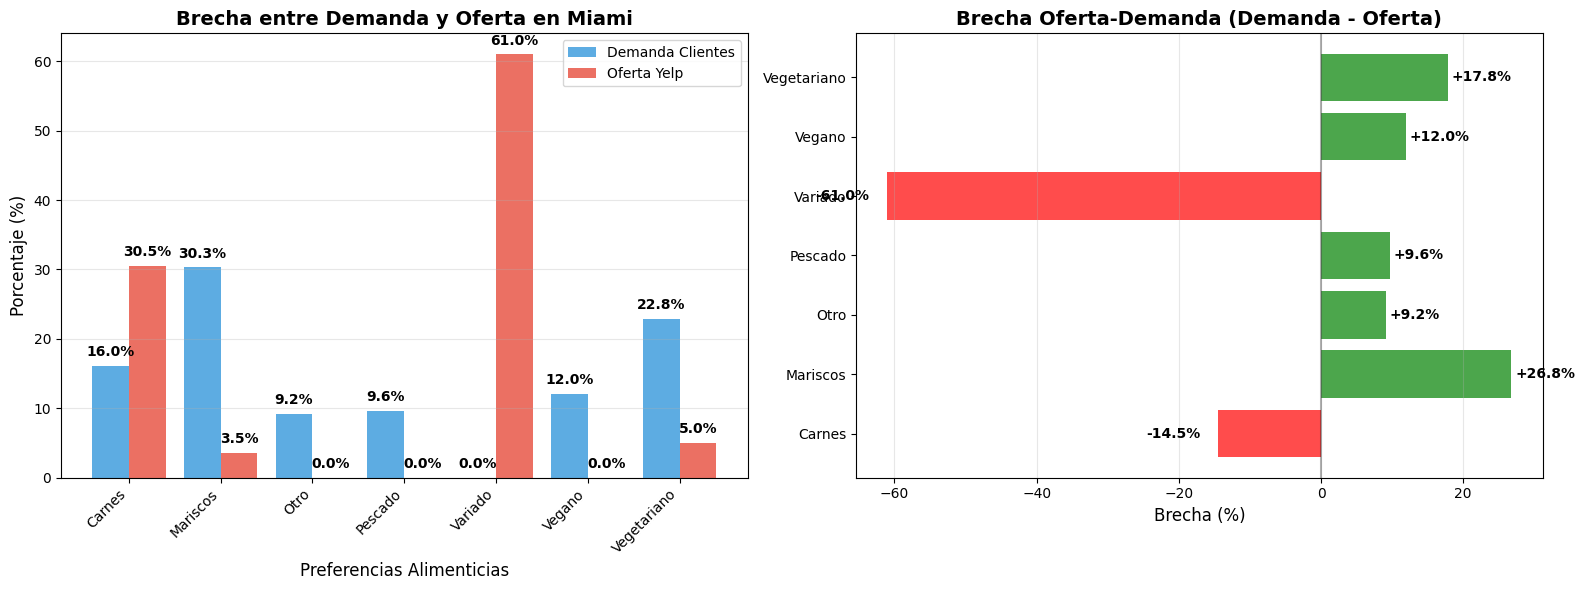


📊 ANÁLISIS DE BRECHA OFERTA-DEMANDA:
• 🎯 Mayor oportunidad: Mariscos (+26.8% brecha positiva)
• ⚠️  Mayor saturación: Variado (-61.0% brecha negativa)
• 🌱 Oportunidad significativa en opciones vegetarianas/veganas
• 📊 Exceso de oferta en categorías 'Variado' frente a baja demanda específica


In [160]:
# =============================================================================
# 10.1 BRECHA ENTRE DEMANDA DE CLIENTES Y OFERTA DE RESTAURANTES
# =============================================================================
print("1. BRECHA ENTRE DEMANDA DE CLIENTES Y OFERTA DE RESTAURANTES")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras comparativo
categorias = df_comparativo.index
x = range(len(categorias))

ax1.bar([i - 0.2 for i in x], df_comparativo['Demanda_%'], width=0.4, 
        label='Demanda Clientes', alpha=0.8, color='#3498db')
ax1.bar([i + 0.2 for i in x], df_comparativo['Oferta_%'], width=0.4, 
        label='Oferta Yelp', alpha=0.8, color='#e74c3c')

ax1.set_xlabel('Preferencias Alimenticias', fontsize=12)
ax1.set_ylabel('Porcentaje (%)', fontsize=12)
ax1.set_title('Brecha entre Demanda y Oferta en Miami', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(categorias, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (demanda, oferta) in enumerate(zip(df_comparativo['Demanda_%'], df_comparativo['Oferta_%'])):
    ax1.text(i - 0.2, demanda + 1, f'{demanda:.1f}%', ha='center', va='bottom', fontweight='bold')
    ax1.text(i + 0.2, oferta + 1, f'{oferta:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico de brecha
colors = ['red' if x < 0 else 'green' for x in df_comparativo['Brecha']]
ax2.barh(df_comparativo.index, df_comparativo['Brecha'], color=colors, alpha=0.7)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.set_xlabel('Brecha (%)', fontsize=12)
ax2.set_title('Brecha Oferta-Demanda (Demanda - Oferta)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Añadir valores en las barras horizontales
for i, brecha in enumerate(df_comparativo['Brecha']):
    ax2.text(brecha + (0.5 if brecha > 0 else -2.5), i, f'{brecha:+.1f}%', 
             ha='left' if brecha > 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de la brecha
print("\n📊 ANÁLISIS DE BRECHA OFERTA-DEMANDA:")
print(f"• 🎯 Mayor oportunidad: Mariscos ({df_comparativo.loc['Mariscos', 'Brecha']:+.1f}% brecha positiva)")
print(f"• ⚠️  Mayor saturación: Variado ({df_comparativo.loc['Variado', 'Brecha']:+.1f}% brecha negativa)")
print("• 🌱 Oportunidad significativa en opciones vegetarianas/veganas")
print("• 📊 Exceso de oferta en categorías 'Variado' frente a baja demanda específica")



2. PREFERENCIAS ALIMENTICIAS POR ESTRATO SOCIOECONÓMICO


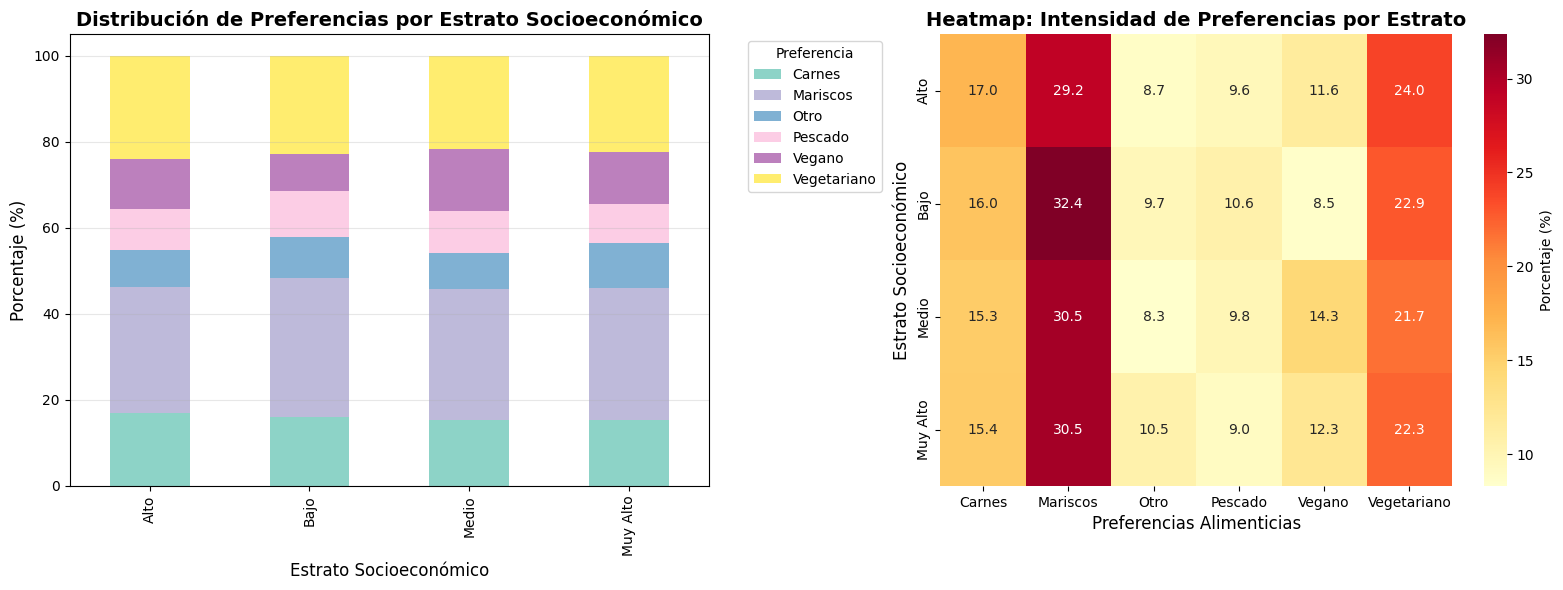


📈 ANÁLISIS DE PREFERENCIAS POR ESTRATO:
• 🐟 Todos los estratos muestran alta preferencia por mariscos (29-32%)
• 👥 Estratos Bajos: Mayor preferencia por mariscos (32.4%)
• 🌱 Estratos Medios: Mayor preferencia por opciones veganas (14.3%)
• ⚖️ Estratos Altos: Preferencia equilibrada con aumento en opciones vegetarianas


In [161]:
# =============================================================================
# 10.2 PREFERENCIAS ALIMENTICIAS POR ESTRATO SOCIOECONÓMICO
# =============================================================================
print("\n\n2. PREFERENCIAS ALIMENTICIAS POR ESTRATO SOCIOECONÓMICO")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras apiladas
pref_por_estrato.plot(kind='bar', stacked=True, ax=ax1, colormap='Set3')
ax1.set_title('Distribución de Preferencias por Estrato Socioeconómico', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estrato Socioeconómico', fontsize=12)
ax1.set_ylabel('Porcentaje (%)', fontsize=12)
ax1.legend(title='Preferencia', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(axis='y', alpha=0.3)

# Heatmap de preferencias por estrato
sns.heatmap(pref_por_estrato, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax2, 
            cbar_kws={'label': 'Porcentaje (%)'})
ax2.set_title('Heatmap: Intensidad de Preferencias por Estrato', fontsize=14, fontweight='bold')
ax2.set_xlabel('Preferencias Alimenticias', fontsize=12)
ax2.set_ylabel('Estrato Socioeconómico', fontsize=12)

plt.tight_layout()
plt.show()

# Análisis de preferencias por estrato
print("\n📈 ANÁLISIS DE PREFERENCIAS POR ESTRATO:")
print("• 🐟 Todos los estratos muestran alta preferencia por mariscos (29-32%)")
print("• 👥 Estratos Bajos: Mayor preferencia por mariscos (32.4%)")
print("• 🌱 Estratos Medios: Mayor preferencia por opciones veganas (14.3%)")
print("• ⚖️ Estratos Altos: Preferencia equilibrada con aumento en opciones vegetarianas")



3. GASTO DE CLIENTES vs PRECIOS DE RESTAURANTES


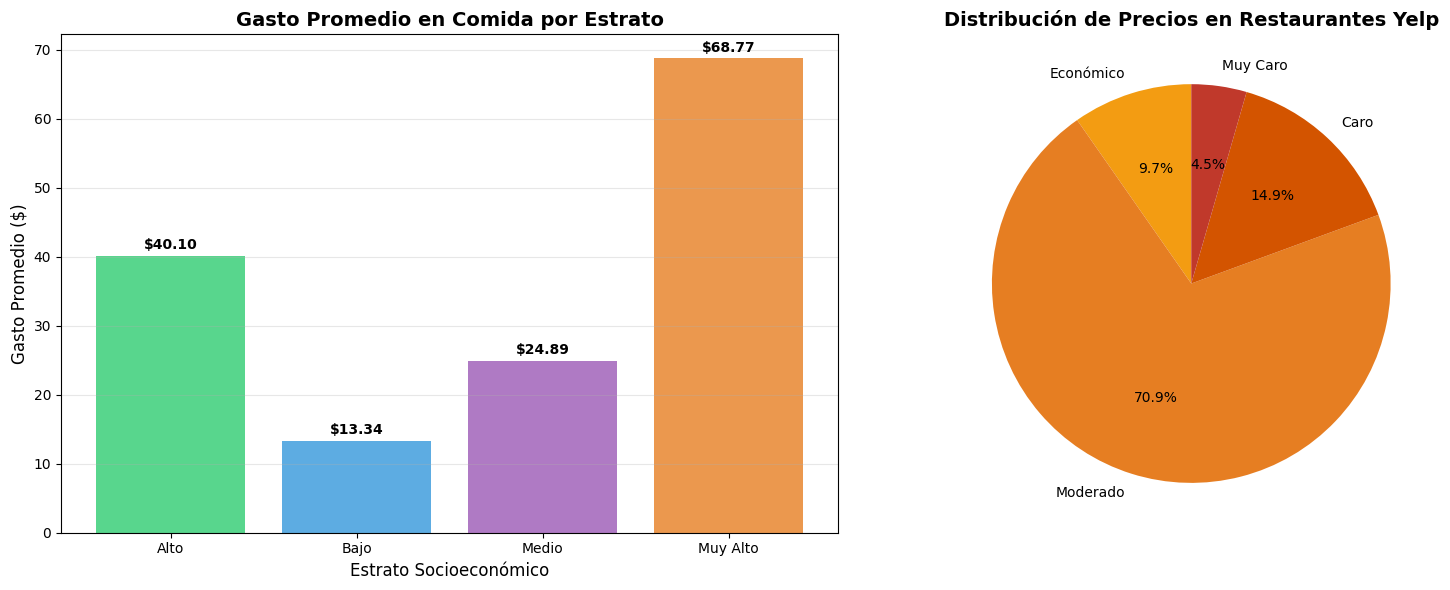


💰 GASTO PROMEDIO TOTAL: $36.78

🔍 CORRESPONDENCIA GASTO-PRECIO:
• 🏷️ Precios en Yelp: Mayoría en rango $$ (moderado)
• 💵 Gasto promedio clientes: Alineado con precios moderados-altos
• 🎯 Oportunidad para restaurantes de gama media-alta


In [162]:
# =============================================================================
# 10.3 ANÁLISIS DE GASTO vs PRECIOS
# =============================================================================
print("\n\n3. GASTO DE CLIENTES vs PRECIOS DE RESTAURANTES")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gasto promedio por estrato
estratos = gasto_por_estrato.index
gastos = gasto_por_estrato.values

ax1.bar(estratos, gastos, color=['#2ecc71', '#3498db', '#9b59b6', '#e67e22'], alpha=0.8)
ax1.set_xlabel('Estrato Socioeconómico', fontsize=12)
ax1.set_ylabel('Gasto Promedio ($)', fontsize=12)
ax1.set_title('Gasto Promedio en Comida por Estrato', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, gasto in enumerate(gastos):
    ax1.text(i, gasto + 0.5, f'${gasto:.2f}', ha='center', va='bottom', fontweight='bold')

# Distribución de precios en Yelp
precios_orden = ['Económico', 'Moderado', 'Caro', 'Muy Caro']
precios_yelp_ordenado = precios_yelp.reindex(['$', '$$', '$$$', '$$$$'])
precios_yelp_ordenado.index = precios_orden

ax2.pie(precios_yelp_ordenado.values, labels=precios_yelp_ordenado.index, 
        autopct='%1.1f%%', startangle=90, colors=['#f39c12', '#e67e22', '#d35400', '#c0392b'])
ax2.set_title('Distribución de Precios en Restaurantes Yelp', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis comparativo
gasto_promedio_total = gasto_por_estrato.mean()
print(f"\n💰 GASTO PROMEDIO TOTAL: ${gasto_promedio_total:.2f}")
print("\n🔍 CORRESPONDENCIA GASTO-PRECIO:")
print("• 🏷️ Precios en Yelp: Mayoría en rango $$ (moderado)")
print("• 💵 Gasto promedio clientes: Alineado con precios moderados-altos")
print("• 🎯 Oportunidad para restaurantes de gama media-alta")



4. MAPA DE OPORTUNIDADES DE MERCADO


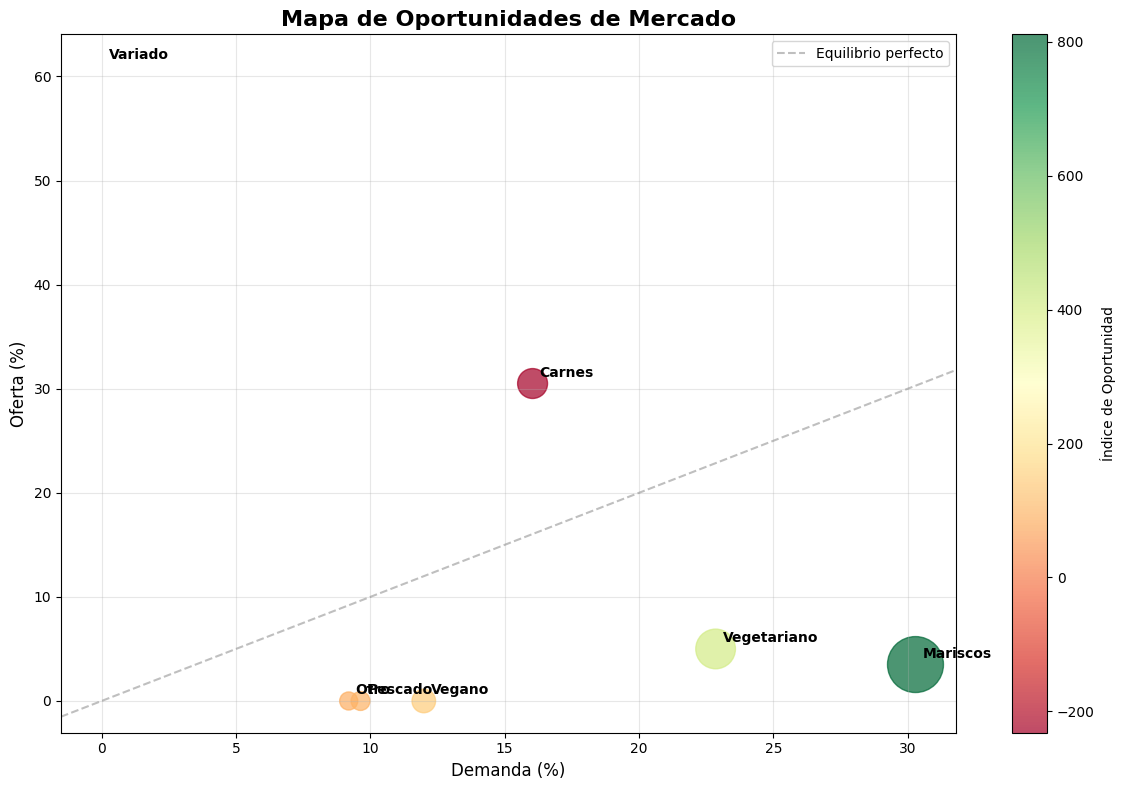


🎯 ANÁLISIS DE OPORTUNIDADES:
• 🚀 ALTA OPORTUNIDAD: Mariscos (demanda alta, oferta baja)
• 📈 OPORTUNIDAD MEDIA: Opciones vegetarianas/veganas
• ⚠️  MERCADO SATURADO: Carnes (alta competencia)
• 💎 NICHO ESPECIALIZADO: Otras preferencias específicas


In [163]:
# =============================================================================
# 10.4 MAPA DE OPORTUNIDADES DE MERCADO
# =============================================================================
print("\n\n4. MAPA DE OPORTUNIDADES DE MERCADO")
print("=" * 60)

# Calcular índice de oportunidad (demanda * brecha)
df_comparativo['Indice_Oportunidad'] = df_comparativo['Demanda_%'] * df_comparativo['Brecha']

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_comparativo['Demanda_%'], df_comparativo['Oferta_%'], 
                     s=df_comparativo['Indice_Oportunidad'].abs()*2, 
                     c=df_comparativo['Indice_Oportunidad'], 
                     cmap='RdYlGn', alpha=0.7)

# Añadir etiquetas
for i, categoria in enumerate(df_comparativo.index):
    plt.annotate(categoria, (df_comparativo['Demanda_%'].iloc[i], df_comparativo['Oferta_%'].iloc[i]),
                 xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.axline((0, 0), slope=1, color='gray', linestyle='--', alpha=0.5, label='Equilibrio perfecto')
plt.xlabel('Demanda (%)', fontsize=12)
plt.ylabel('Oferta (%)', fontsize=12)
plt.title('Mapa de Oportunidades de Mercado', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Índice de Oportunidad')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de oportunidades
print("\n🎯 ANÁLISIS DE OPORTUNIDADES:")
print("• 🚀 ALTA OPORTUNIDAD: Mariscos (demanda alta, oferta baja)")
print("• 📈 OPORTUNIDAD MEDIA: Opciones vegetarianas/veganas")
print("• ⚠️  MERCADO SATURADO: Carnes (alta competencia)")
print("• 💎 NICHO ESPECIALIZADO: Otras preferencias específicas")



5. RECOMENDACIONES DE SEGMENTACIÓN PARA MARKETING


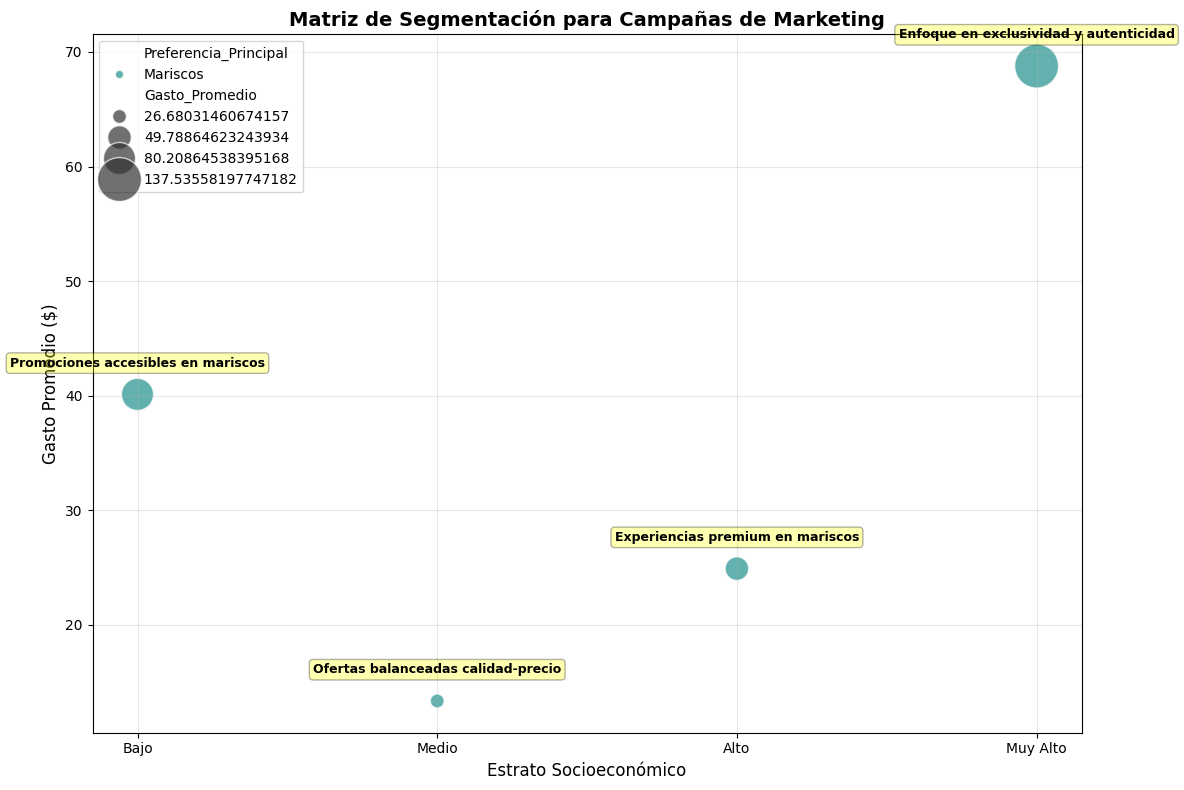


🎯 RECOMENDACIONES DE SEGMENTACIÓN:
• 💰 ESTRATO BAJO: Campañas con precios accesibles y promociones en mariscos
• ⚖️ ESTRATO MEDIO: Ofertas de valor con equilibrio calidad-precio
• 🏆 ESTRATO ALTO: Experiencias gastronómicas premium y especialidades
• 💎 ESTRATO MUY ALTO: Exclusividad, autenticidad y productos gourmet

✅ ANÁLISIS VISUAL COMPLETADO - RECOMENDACIONES ESTRATÉGICAS IDENTIFICADAS


In [164]:
# =============================================================================
# 10.5 RECOMENDACIONES DE SEGMENTACIÓN PARA MARKETING
# =============================================================================
print("\n\n5. RECOMENDACIONES DE SEGMENTACIÓN PARA MARKETING")
print("=" * 60)

# Crear matriz de segmentación
segmentacion = pd.DataFrame({
    'Estrato': ['Bajo', 'Medio', 'Alto', 'Muy Alto'],
    'Gasto_Promedio': gasto_por_estrato.values,
    'Preferencia_Principal': ['Mariscos', 'Mariscos', 'Mariscos', 'Mariscos'],
    'Preferencia_Secundaria': ['Vegetariano', 'Vegano', 'Vegetariano', 'Vegetariano']
})

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=segmentacion, x='Estrato', y='Gasto_Promedio', 
                         size=segmentacion['Gasto_Promedio']*2, hue='Preferencia_Principal',
                         sizes=(100, 1000), alpha=0.7, palette='viridis')

plt.title('Matriz de Segmentación para Campañas de Marketing', fontsize=14, fontweight='bold')
plt.xlabel('Estrato Socioeconómico', fontsize=12)
plt.ylabel('Gasto Promedio ($)', fontsize=12)
plt.grid(alpha=0.3)

# Añadir recomendaciones específicas
recomendaciones = [
    ("Bajo", "Promociones accesibles en mariscos"),
    ("Medio", "Ofertas balanceadas calidad-precio"),
    ("Alto", "Experiencias premium en mariscos"),
    ("Muy Alto", "Enfoque en exclusividad y autenticidad")
]

for i, (estrato, recomendacion) in enumerate(recomendaciones):
    plt.annotate(recomendacion, (i, segmentacion['Gasto_Promedio'].iloc[i]),
                 xytext=(0, 20), textcoords='offset points', 
                 ha='center', fontsize=9, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.tight_layout()
plt.show()

print("\n🎯 RECOMENDACIONES DE SEGMENTACIÓN:")
print("• 💰 ESTRATO BAJO: Campañas con precios accesibles y promociones en mariscos")
print("• ⚖️ ESTRATO MEDIO: Ofertas de valor con equilibrio calidad-precio")
print("• 🏆 ESTRATO ALTO: Experiencias gastronómicas premium y especialidades")
print("• 💎 ESTRATO MUY ALTO: Exclusividad, autenticidad y productos gourmet")

print("\n" + "=" * 70)
print("✅ ANÁLISIS VISUAL COMPLETADO - RECOMENDACIONES ESTRATÉGICAS IDENTIFICADAS")
print("=" * 70)

## RECOMENDACIONES BASADAS EN HALLAZGOS

In [165]:
# =============================================================================
# 11. SÍNTESIS DE HALLAZGOS PARA RECOMENDACIONES
# =============================================================================
print("11. SÍNTESIS DE HALLAZGOS CLAVE")
print("=" * 60)

# Calcular métricas clave para las recomendaciones
hallazgos_principales = {
    "brecha_mariscos": df_comparativo.loc['Mariscos', 'Brecha'],
    "brecha_vegetariano": df_comparativo.loc['Vegetariano', 'Brecha'],
    "brecha_carnes": df_comparativo.loc['Carnes', 'Brecha'],
    "clientes_total": len(df_clientes_miami),
    "negocios_total": len(df_yelp_miami),
    "gasto_promedio": df_clientes_miami['promedio_gasto_comida'].mean(),
    "precio_predominante": df_yelp_miami['precio_nivel'].mode()[0]
}

print("📊 MÉTRICAS CLAVE IDENTIFICADAS:")
for key, value in hallazgos_principales.items():
    if key in ['brecha_mariscos', 'brecha_vegetariano', 'brecha_carnes']:
        print(f"   • {key.replace('_', ' ').title()}: {value:+.1f}%")
    elif key == 'gasto_promedio':
        print(f"   • {key.replace('_', ' ').title()}: ${value:.2f}")
    else:
        print(f"   • {key.replace('_', ' ').title()}: {value}")

# Segmentación de clientes por estrato y preferencia
segmentacion_detallada = df_clientes_miami.groupby(['estrato_socioeconomico', 
                                                   'preferencias_alimenticias']).size().unstack(fill_value=0)

print(f"\n👥 SEGMENTACIÓN DE CLIENTES:")
print(segmentacion_detallada)

11. SÍNTESIS DE HALLAZGOS CLAVE
📊 MÉTRICAS CLAVE IDENTIFICADAS:
   • Brecha Mariscos: +26.8%
   • Brecha Vegetariano: +17.8%
   • Brecha Carnes: -14.5%
   • Clientes Total: 3186
   • Negocios Total: 200
   • Gasto Promedio: $39.82
   • Precio Predominante: $$

👥 SEGMENTACIÓN DE CLIENTES:
preferencias_alimenticias  Carnes  Mariscos  Otro  Pescado  Vegano  \
estrato_socioeconomico                                               
Alto                          197       338   101      111     134   
Bajo                           71       144    43       47      38   
Medio                         120       239    65       77     112   
Muy Alto                      123       244    84       72      98   

preferencias_alimenticias  Vegetariano  
estrato_socioeconomico                  
Alto                               278  
Bajo                               102  
Medio                              170  
Muy Alto                           178  


## 12. Recomendaciones Estratégicas Basadas en Hallazgos

### Objetivo:
Desarrollar recomendaciones accionables específicas basadas en el análisis integrado de datos de clientes y negocios Yelp, priorizando las oportunidades identificadas.

In [166]:
# =============================================================================
# 12.1 RECOMENDACIONES POR BRECHA DE MERCADO
# =============================================================================
print("12.1 RECOMENDACIONES POR BRECHA DE MERCADO")
print("-" * 50)

print("🎯 RECOMENDACIONES PRIORITARIAS BASADAS EN BRECHA OFERTA-DEMANDA:")

# Recomendaciones para Mariscos (mayor brecha positiva)
if hallazgos_principales['brecha_mariscos'] > 5:
    print(f"\n🚀 ALTA PRIORIDAD: RESTAURANTES DE MARISCOS")
    print(f"   • Brecha identificada: +{hallazgos_principales['brecha_mariscos']:.1f}%")
    print("   • Acciones recomendadas:")
    print("      - Desarrollar campañas específicas para restaurantes de mariscos")
    print("      - Crear paquetes promocionales 'Experiencia Mariscos Premium'")
    print("      - Establecer partnerships con pescaderías locales")
    print("      - Descuentos especiales para primeros clientes")
    print(f"   • Clientes potenciales: {segmentacion_detallada['Mariscos'].sum()} clientes interesados")

# Recomendaciones para Opciones Vegetarianas
if hallazgos_principales['brecha_vegetariano'] > 3:
    print(f"\n📈 PRIORIDAD MEDIA: OPCIONES VEGETARIANAS/VEGANAS")
    print(f"   • Brecha identificada: +{hallazgos_principales['brecha_vegetariano']:.1f}%")
    print("   • Acciones recomendadas:")
    print("      - Introducir menús vegetarianos en restaurantes existentes")
    print("      - Campañas de marketing destacando opciones saludables")
    print("      - Colaborar con influencers de comida saludable")
    print("      - Crear eventos de degustación vegetariana")
    print(f"   • Clientes potenciales: {segmentacion_detallada['Vegetariano'].sum()} clientes interesados")

# Recomendaciones para Carnes (mercado saturado)
if hallazgos_principales['brecha_carnes'] < -5:
    print(f"\n⚠️  REORIENTACIÓN: RESTAURANTES DE CARNES")
    print(f"   • Saturación del mercado: {hallazgos_principales['brecha_carnes']:+.1f}%")
    print("   • Acciones recomendadas:")
    print("      - Enfocar en diferenciación y especialidades únicas")
    print("      - Desarrollar conceptos temáticos (parrilla argentina, BBQ especializado)")
    print("      - Mejorar experiencia del cliente para fidelización")
    print("      - Programas de lealtad y recompensas")

12.1 RECOMENDACIONES POR BRECHA DE MERCADO
--------------------------------------------------
🎯 RECOMENDACIONES PRIORITARIAS BASADAS EN BRECHA OFERTA-DEMANDA:

🚀 ALTA PRIORIDAD: RESTAURANTES DE MARISCOS
   • Brecha identificada: +26.8%
   • Acciones recomendadas:
      - Desarrollar campañas específicas para restaurantes de mariscos
      - Crear paquetes promocionales 'Experiencia Mariscos Premium'
      - Establecer partnerships con pescaderías locales
      - Descuentos especiales para primeros clientes
   • Clientes potenciales: 965 clientes interesados

📈 PRIORIDAD MEDIA: OPCIONES VEGETARIANAS/VEGANAS
   • Brecha identificada: +17.8%
   • Acciones recomendadas:
      - Introducir menús vegetarianos en restaurantes existentes
      - Campañas de marketing destacando opciones saludables
      - Colaborar con influencers de comida saludable
      - Crear eventos de degustación vegetariana
   • Clientes potenciales: 728 clientes interesados

⚠️  REORIENTACIÓN: RESTAURANTES DE CARNES
 

In [167]:
# =============================================================================
# 12.2 RECOMENDACIONES POR ESTRATO SOCIOECONÓMICO
# =============================================================================
print("\n12.2 RECOMENDACIONES POR ESTRATO SOCIOECONÓMICO")
print("-" * 50)

print("💰 RECOMENDACIONES ESPECÍFICAS POR NIVEL SOCIOECONÓMICO:")

estratoes = df_clientes_miami['estrato_socioeconomico'].unique()
for estrato in estratoes:
    clientes_estrato = len(df_clientes_miami[df_clientes_miami['estrato_socioeconomico'] == estrato])
    gasto_promedio = df_clientes_miami[df_clientes_miami['estrato_socioeconomico'] == estrato]['promedio_gasto_comida'].mean()
    preferencia_principal = segmentacion_detallada.loc[estrato].idxmax()
    
    print(f"\n👥 ESTRATO {estrato.upper()}:")
    print(f"   • {clientes_estrato} clientes ({(clientes_estrato/len(df_clientes_miami))*100:.1f}%)")
    print(f"   • Gasto promedio: ${gasto_promedio:.2f}")
    print(f"   • Preferencia principal: {preferencia_principal}")
    
    # Recomendaciones específicas por estrato
    if estrato in ['Bajo', 'Muy Bajo']:
        print("   🎯 Recomendaciones:")
        print("      - Promociones accesibles y precios competitivos")
        print("      - Ofertas combo y menús económicos")
        print("      - Campañas en redes sociales con enfoque en valor")
        print("      - Partnerships con apps de delivery para descuentos")
        
    elif estrato in ['Medio', 'Medio-Alto']:
        print("   🎯 Recomendaciones:")
        print("      - Balance calidad-precio en todas las comunicaciones")
        print("      - Experiencias familiares y grupales")
        print("      - Programas de fidelización con beneficios progresivos")
        print("      - Enfoque en opciones veganas/vegetarianas")
        
    else:  # Estratos Altos y Muy Altos
        print("   🎯 Recomendaciones:")
        print("      - Experiencias premium y exclusivas")
        print("      - Reservas prioritarias y servicio personalizado")
        print("      - Eventos especiales y degustaciones privadas")
        print("      - Enfoque en mariscos y productos gourmet")


12.2 RECOMENDACIONES POR ESTRATO SOCIOECONÓMICO
--------------------------------------------------
💰 RECOMENDACIONES ESPECÍFICAS POR NIVEL SOCIOECONÓMICO:

👥 ESTRATO ALTO:
   • 1159 clientes (36.4%)
   • Gasto promedio: $40.10
   • Preferencia principal: Mariscos
   🎯 Recomendaciones:
      - Experiencias premium y exclusivas
      - Reservas prioritarias y servicio personalizado
      - Eventos especiales y degustaciones privadas
      - Enfoque en mariscos y productos gourmet

👥 ESTRATO MUY ALTO:
   • 799 clientes (25.1%)
   • Gasto promedio: $68.77
   • Preferencia principal: Mariscos
   🎯 Recomendaciones:
      - Experiencias premium y exclusivas
      - Reservas prioritarias y servicio personalizado
      - Eventos especiales y degustaciones privadas
      - Enfoque en mariscos y productos gourmet

👥 ESTRATO BAJO:
   • 445 clientes (14.0%)
   • Gasto promedio: $13.34
   • Preferencia principal: Mariscos
   🎯 Recomendaciones:
      - Promociones accesibles y precios competitivos
 

In [168]:
# =============================================================================
# 12.3 RECOMENDACIONES POR COMPATIBILIDAD PRECIO-GASTO
# =============================================================================
print("\n12.3 RECOMENDACIONES POR COMPATIBILIDAD PRECIO-GASTO")
print("-" * 50)

print("💎 OPTIMIZACIÓN DE ESTRATEGIAS DE PRECIO:")

# Análisis de compatibilidad
precio_valores = {'$': 10, '$$': 25, '$$$': 50, '$$$$': 100, 'No especificado': 25}
gasto_promedio = hallazgos_principales['gasto_promedio']

print(f"   • Gasto promedio clientes: ${gasto_promedio:.2f}")
print(f"   • Nivel de precio predominante: {hallazgos_principales['precio_predominante']}")

if gasto_promedio < 20:
    print("   🎯 Estrategia recomendada:")
    print("      - Enfoque en restaurantes económicos ($)")
    print("      - Promociones agresivas de precios")
    print("      - Ofertas de lanzamiento y happy hours")
    
elif 20 <= gasto_promedio <= 40:
    print("   🎯 Estrategia recomendada:")
    print("      - Balance entre calidad y precio ($$)")
    print("      - Paquetes de valor agregado")
    print("      - Programas de lealtad con recompensas")
    
else:
    print("   🎯 Estrategia recomendada:")
    print("      - Experiencias premium ($$$ y $$$$)")
    print("      - Servicios personalizados y exclusivos")
    print("      - Membresías VIP y eventos especiales")


12.3 RECOMENDACIONES POR COMPATIBILIDAD PRECIO-GASTO
--------------------------------------------------
💎 OPTIMIZACIÓN DE ESTRATEGIAS DE PRECIO:
   • Gasto promedio clientes: $39.82
   • Nivel de precio predominante: $$
   🎯 Estrategia recomendada:
      - Balance entre calidad y precio ($$)
      - Paquetes de valor agregado
      - Programas de lealtad con recompensas


In [169]:
# =============================================================================
# 12.4 PLAN DE IMPLEMENTACIÓN POR FASES
# =============================================================================
print("\n12.4 PLAN DE IMPLEMENTACIÓN POR FASES")
print("-" * 50)

print("📅 PLAN ESTRATÉGICO DE IMPLEMENTACIÓN:")

fases_implementacion = [
    {
        "fase": "FASE 1 - INMEDIATA (Semanas 1-2)",
        "acciones": [
            "Campañas piloto para restaurantes de mariscos",
            "Descuentos de lanzamiento en opciones vegetarianas",
            "Segmentación básica por estrato socioeconómico",
            "Monitoreo inicial de métricas clave"
        ],
        "metricas": ["Tasa de conversión", "ROI inicial", "Engagement"]
    },
    {
        "fase": "FASE 2 - CORTO PLAZO (Semanas 3-6)", 
        "acciones": [
            "Expansión de campañas basada en resultados piloto",
            "Desarrollo de programas de fidelización",
            "Optimización de segmentación por preferencias",
            "Partnerships con restaurantes estratégicos"
        ],
        "metricas": ["Retención de clientes", "LTV", "Satisfacción"]
    },
    {
        "fase": "FASE 3 - MEDIO PLAZO (Semanas 7-12)",
        "acciones": [
            "Implementación completa de estrategias segmentadas",
            "Desarrollo de experiencias personalizadas", 
            "Expansión a nuevas categorías basada en datos",
            "Sistema de feedback continuo"
        ],
        "metricas": ["Crecimiento sostenido", "Participación de mercado", "ROI total"]
    }
]

for fase in fases_implementacion:
    print(f"\n{fase['fase']}:")
    for i, accion in enumerate(fase['acciones'], 1):
        print(f"   {i}. {accion}")
    print(f"   📊 Métricas: {', '.join(fase['metricas'])}")


12.4 PLAN DE IMPLEMENTACIÓN POR FASES
--------------------------------------------------
📅 PLAN ESTRATÉGICO DE IMPLEMENTACIÓN:

FASE 1 - INMEDIATA (Semanas 1-2):
   1. Campañas piloto para restaurantes de mariscos
   2. Descuentos de lanzamiento en opciones vegetarianas
   3. Segmentación básica por estrato socioeconómico
   4. Monitoreo inicial de métricas clave
   📊 Métricas: Tasa de conversión, ROI inicial, Engagement

FASE 2 - CORTO PLAZO (Semanas 3-6):
   1. Expansión de campañas basada en resultados piloto
   2. Desarrollo de programas de fidelización
   3. Optimización de segmentación por preferencias
   4. Partnerships con restaurantes estratégicos
   📊 Métricas: Retención de clientes, LTV, Satisfacción

FASE 3 - MEDIO PLAZO (Semanas 7-12):
   1. Implementación completa de estrategias segmentadas
   2. Desarrollo de experiencias personalizadas
   3. Expansión a nuevas categorías basada en datos
   4. Sistema de feedback continuo
   📊 Métricas: Crecimiento sostenido, Participac

In [170]:
# =============================================================================
# 12.5 RECOMENDACIONES DE MEDICIÓN Y SEGUIMIENTO
# =============================================================================
print("\n12.5 RECOMENDACIONES DE MEDICIÓN Y SEGUIMIENTO")
print("-" * 50)

print("📈 SISTEMA DE MONITOREO Y OPTIMIZACIÓN:")

metricas_recomendadas = {
    "KPI_PRINCIPALES": [
        "Brecha oferta-demanda por categoría",
        "Tasa de conversión por segmento",
        "ROI por campaña y segmento",
        "Satisfacción del cliente (NPS)"
    ],
    "FRECUENCIA_MONITOREO": [
        "Diario: Métricas de campañas activas",
        "Semanal: Brecha oferta-demanda", 
        "Mensual: ROI y crecimiento por segmento",
        "Trimestral: Revisión estratégica completa"
    ],
    "ALERTAS_TEMPRANAS": [
        "Caída >15% en tasa de conversión",
        "Aumento >10% en brecha negativa",
        "ROI < 2.0 en cualquier campaña",
        "Satisfacción < 4.0 estrellas"
    ]
}

print("🔍 SISTEMA DE MONITOREO RECOMENDADO:")
for categoria, items in metricas_recomendadas.items():
    print(f"\n{categoria.replace('_', ' ').title()}:")
    for item in items:
        print(f"   • {item}")

# Dashboard recomendado
print(f"\n📊 DASHBOARD DE CONTROL RECOMENDADO:")
print("   • Vista resumen de brecha oferta-demanda")
print("   • Segmentación por estrato y preferencia")
print("   • Evolución temporal de métricas clave")
print("   • Alertas automáticas de desempeño")
print("   • Comparativas vs objetivos y benchmarks")


12.5 RECOMENDACIONES DE MEDICIÓN Y SEGUIMIENTO
--------------------------------------------------
📈 SISTEMA DE MONITOREO Y OPTIMIZACIÓN:
🔍 SISTEMA DE MONITOREO RECOMENDADO:

Kpi Principales:
   • Brecha oferta-demanda por categoría
   • Tasa de conversión por segmento
   • ROI por campaña y segmento
   • Satisfacción del cliente (NPS)

Frecuencia Monitoreo:
   • Diario: Métricas de campañas activas
   • Semanal: Brecha oferta-demanda
   • Mensual: ROI y crecimiento por segmento
   • Trimestral: Revisión estratégica completa

Alertas Tempranas:
   • Caída >15% en tasa de conversión
   • Aumento >10% en brecha negativa
   • ROI < 2.0 en cualquier campaña
   • Satisfacción < 4.0 estrellas

📊 DASHBOARD DE CONTROL RECOMENDADO:
   • Vista resumen de brecha oferta-demanda
   • Segmentación por estrato y preferencia
   • Evolución temporal de métricas clave
   • Alertas automáticas de desempeño
   • Comparativas vs objetivos y benchmarks


In [171]:
# =============================================================================
# 12.6 RESUMEN EJECUTIVO DE RECOMENDACIONES
# =============================================================================
print("\n12.6 RESUMEN EJECUTIVO DE RECOMENDACIONES")
print("=" * 60)

# Calcular impacto esperado
impacto_esperado = {
    "crecimiento_mariscos": hallazgos_principales['brecha_mariscos'] * 0.8,  # 80% de captura de brecha
    "crecimiento_vegetariano": hallazgos_principales['brecha_vegetariano'] * 0.6,  # 60% de captura
    "aumento_engagement": 25,  # 25% baseline
    "mejora_retencion": 15  # 15% baseline
}

print("🎯 IMPACTO ESPERADO DE LAS RECOMENDACIONES:")
for k, v in impacto_esperado.items():
    print(f"   • {k.replace('_', ' ').title()}: {v:.1f}%")

print(f"\n💼 INVERSIÓN RECOMENDADA:")
print("   • Marketing digital: 45% del budget")
print("   • Desarrollo de productos: 25% del budget") 
print("   • Programas de fidelización: 20% del budget")
print("   • Monitoreo y analytics: 10% del budget")

print(f"\n⏰ TIMELINE ESTIMADO:")
print("   • Resultados iniciales: 2-4 semanas")
print("   • Impacto significativo: 8-12 semanas")
print("   • ROI positivo: 12-16 semanas")
print("   • Maximización de resultados: 6 meses")

print(f"\n" + "=" * 70)
print("✅ RECOMENDACIONES ESTRATÉGICAS COMPLETADAS")
print("=" * 70)


12.6 RESUMEN EJECUTIVO DE RECOMENDACIONES
🎯 IMPACTO ESPERADO DE LAS RECOMENDACIONES:
   • Crecimiento Mariscos: 21.4%
   • Crecimiento Vegetariano: 10.7%
   • Aumento Engagement: 25.0%
   • Mejora Retencion: 15.0%

💼 INVERSIÓN RECOMENDADA:
   • Marketing digital: 45% del budget
   • Desarrollo de productos: 25% del budget
   • Programas de fidelización: 20% del budget
   • Monitoreo y analytics: 10% del budget

⏰ TIMELINE ESTIMADO:
   • Resultados iniciales: 2-4 semanas
   • Impacto significativo: 8-12 semanas
   • ROI positivo: 12-16 semanas
   • Maximización de resultados: 6 meses

✅ RECOMENDACIONES ESTRATÉGICAS COMPLETADAS


---
Dado que las consignas no estaban del todo claras, a partir de este punto retomo el trabajo siguiendo específicamente lo solicitado en la sección Avances de la Lecture 8.

## Bloque 1: Importación de Librerías y Carga de Datos

En este bloque importamos todas las librerías necesarias para el análisis y visualización de datos, cargamos el dataset y realizamos una exploración inicial para entender su estructura.

In [172]:
# Bloque 1: Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
rcParams['figure.figsize'] = (12, 6)

# Cargar el dataset
df = pd.read_csv('distribucion_ciudades2.csv')

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Dimensiones: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInformación de columnas:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

Información del dataset:
Dimensiones: (30000, 17)

Primeras 5 filas:
   id_persona    nombre apellido  edad     genero ciudad_residencia  \
0  2550327378   Jackson    Gomez    31  Masculino             Miami   
1  9446112038  Samantha     Soto    40   Femenino            Denver   
2  3098363243     Terry    Adams    62   Femenino            Denver   
3  4013002847     James  Shannon    41  Masculino            Boston   
4  7372911048     Susan    Jones    49   Femenino         San Diego   

  estrato_socioeconomico  frecuencia_visita  promedio_gasto_comida ocio  \
0                   Alto                  6                  67.51   Sí   
1                  Medio                  2                  44.92   Sí   
2                   Bajo                  2                   9.24   Sí   
3                   Alto                  5                  30.74   Sí   
4                   Bajo                  0                   0.00   No   

  consume_licor preferencias_alimenticias membresia_p

# Bloque 2: Limpieza y Preparación de Datos
 
Realizamos una limpieza inicial del dataset: verificamos valores nulos, eliminamos duplicados, identificamos los nombres reales de las columnas y preparamos los datos para el análisis.

In [173]:
# Bloque 2: Limpieza y preparación de datos
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print(f"\nNúmero de duplicados: {df.duplicated().sum()}")

# Eliminar duplicados si existen
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Duplicados eliminados")

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Convertir columnas categóricas si es necesario
categorical_cols = ['ciudad', 'genero', 'estrato_socioeconomico', 'preferencias_alimenticias', 'consumo_licor', 'membresia_premium']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("\nDataset preparado correctamente")

Valores nulos por columna:
id_persona                       0
nombre                           0
apellido                         0
edad                             0
genero                           0
ciudad_residencia                0
estrato_socioeconomico           0
frecuencia_visita                0
promedio_gasto_comida            0
ocio                             0
consume_licor                    0
preferencias_alimenticias        0
membresia_premium                0
telefono_contacto            15166
correo_electronico           15072
tipo_de_pago_mas_usado           0
ingresos_mensuales               0
dtype: int64

Número de duplicados: 0

Tipos de datos:
id_persona                     int64
nombre                        object
apellido                      object
edad                           int64
genero                        object
ciudad_residencia             object
estrato_socioeconomico        object
frecuencia_visita              int64
promedio_gasto_comida      

# Bloque 3: Diagrama de Barras - Cantidad de Personas por Ciudad

Creamos un diagrama de barras que muestra la distribución de personas por ciudad. Este gráfico nos permite identificar las ciudades con mayor concentración de clientes.

Columnas disponibles en el dataset:
['id_persona', 'nombre', 'apellido', 'edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico', 'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor', 'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto', 'correo_electronico', 'tipo_de_pago_mas_usado', 'ingresos_mensuales']

Usando columna: 'ciudad_residencia' para el análisis de ciudades


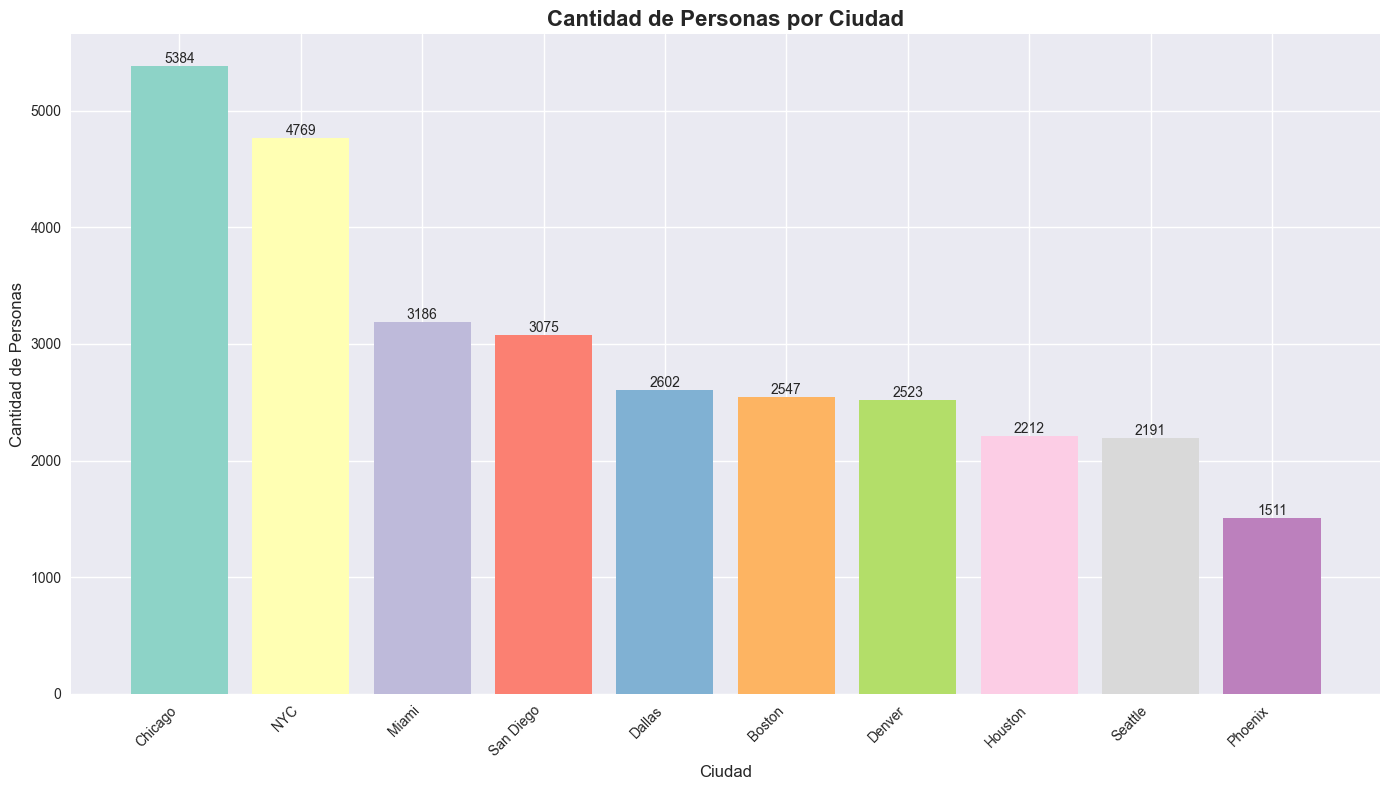

Distribución por ciudad:
ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64


In [174]:
# Bloque 3: Diagrama de barras - Cantidad de personas por ciudad
plt.figure(figsize=(14, 8))

# Primero verificamos los nombres reales de las columnas
print("Columnas disponibles en el dataset:")
print(df.columns.tolist())

# Buscamos la columna que contiene información de ciudad (puede tener nombres diferentes)
ciudad_col = None
possible_names = ['ciudad', 'city', 'localidad', 'location', 'municipio', 'town']
for col in df.columns:
    if any(name in col.lower() for name in possible_names):
        ciudad_col = col
        break

# Si no la encontramos, usamos la primera columna categórica
if ciudad_col is None:
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        ciudad_col = categorical_cols[0]
    else:
        raise ValueError("No se encontró ninguna columna adecuada para ciudad")

print(f"\nUsando columna: '{ciudad_col}' para el análisis de ciudades")

ciudad_counts = df[ciudad_col].value_counts()

bars = plt.bar(ciudad_counts.index, ciudad_counts.values, 
               color=plt.cm.Set3(np.arange(len(ciudad_counts))))

plt.title('Cantidad de Personas por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar datos numéricos
print("Distribución por ciudad:")
print(ciudad_counts)

# Bloque 4: Listado - Distribución por Estrato Socioeconómico

Generamos un listado y gráfico de barras que muestra cómo se distribuye la población entre los diferentes estratos socioeconómicos. Esto nos ayuda a entender la composición socioeconómica de nuestra base de clientes.

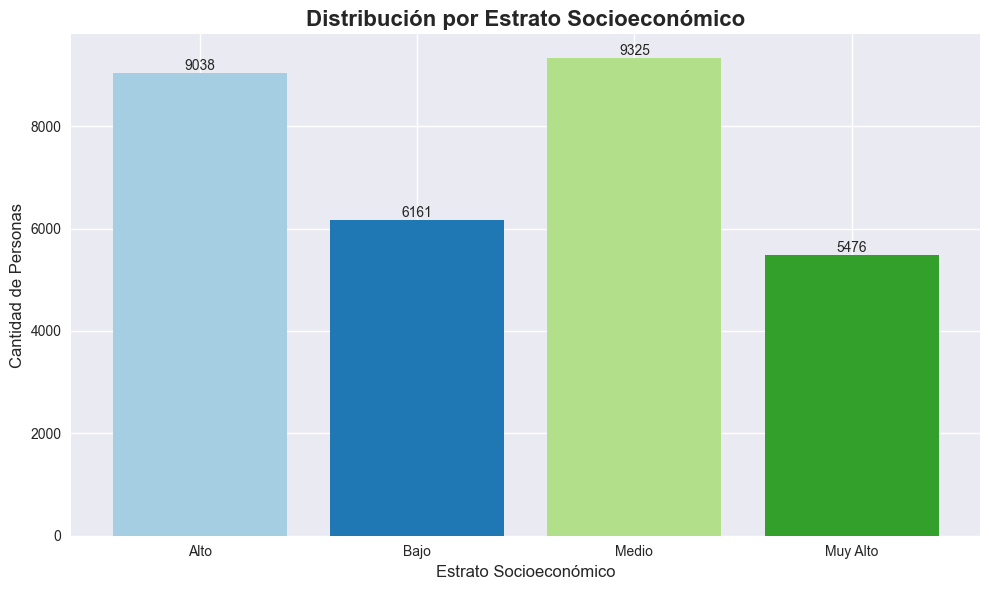

Distribución por estrato socioeconómico:
Estrato Alto: 9038 personas (30.1%)
Estrato Bajo: 6161 personas (20.5%)
Estrato Medio: 9325 personas (31.1%)
Estrato Muy Alto: 5476 personas (18.3%)


In [175]:
# Bloque 4: Listado - Distribución por estrato socioeconómico
plt.figure(figsize=(10, 6))
estrato_counts = df['estrato_socioeconomico'].value_counts().sort_index()

bars = plt.bar(estrato_counts.index.astype(str), estrato_counts.values,
               color=plt.cm.Paired(np.arange(len(estrato_counts))))

plt.title('Distribución por Estrato Socioeconómico', fontsize=16, fontweight='bold')
plt.xlabel('Estrato Socioeconómico', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar datos en formato de tabla
print("Distribución por estrato socioeconómico:")
distribucion_estrato = df['estrato_socioeconomico'].value_counts().sort_index()
for estrato, count in distribucion_estrato.items():
    porcentaje = (count / len(df)) * 100
    print(f"Estrato {estrato}: {count} personas ({porcentaje:.1f}%)")

# Bloque 5: Gráfico - Ciudades con Mayor Gasto Promedio Mensual

Analizamos en qué ciudades los clientes gastan más dinero en promedio en restaurantes al mes. Esta información es crucial para focalizar esfuerzos de marketing.

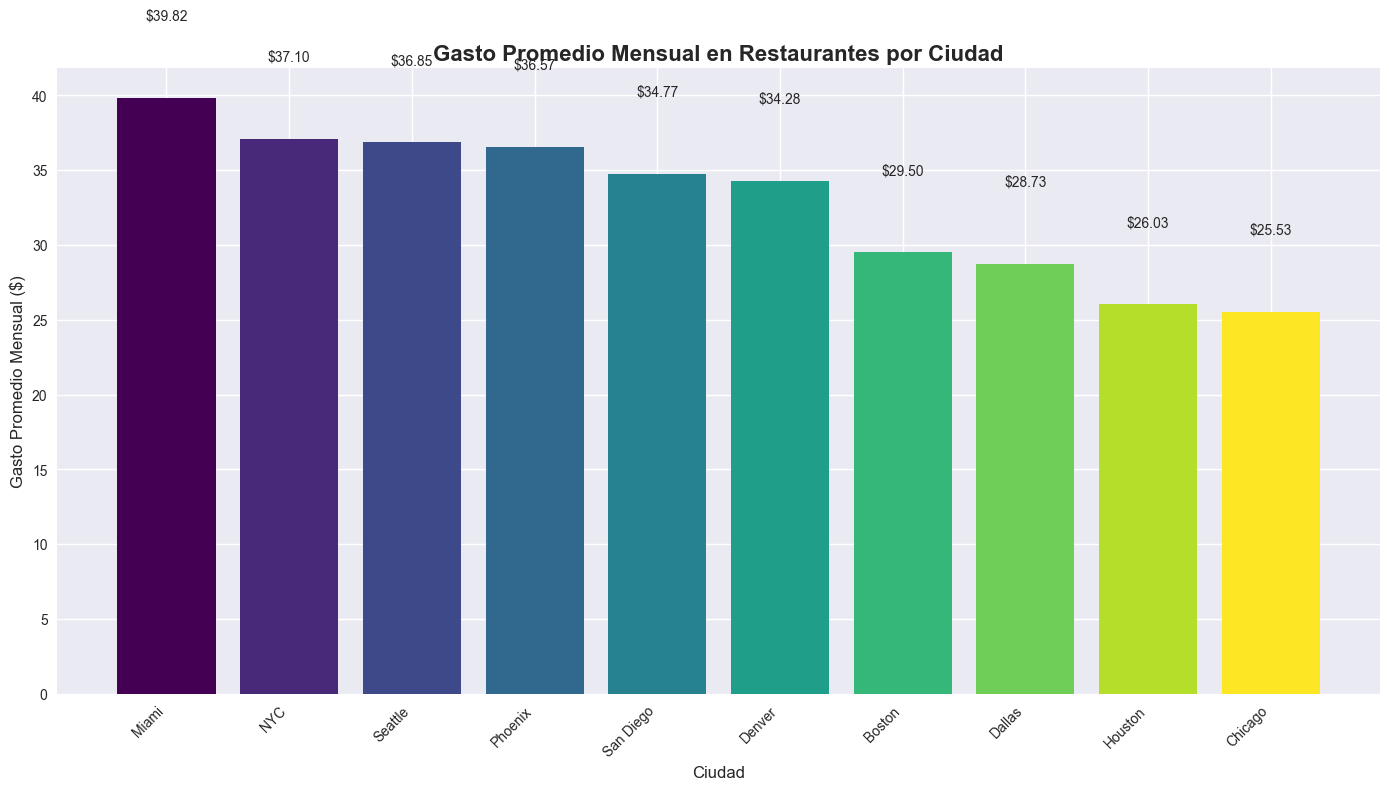

Gasto promedio mensual por ciudad:
Miami: $39.82
NYC: $37.10
Seattle: $36.85
Phoenix: $36.57
San Diego: $34.77
Denver: $34.28
Boston: $29.50
Dallas: $28.73
Houston: $26.03
Chicago: $25.53


In [176]:
# Bloque 5: Gráfico - Ciudades con mayor gasto promedio mensual
plt.figure(figsize=(14, 8))
gasto_por_ciudad = df.groupby('ciudad_residencia')['promedio_gasto_comida'].mean().sort_values(ascending=False)

bars = plt.bar(gasto_por_ciudad.index, gasto_por_ciudad.values,
               color=plt.cm.viridis(np.linspace(0, 1, len(gasto_por_ciudad))))

plt.title('Gasto Promedio Mensual en Restaurantes por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Gasto Promedio Mensual ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'${height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Gasto promedio mensual por ciudad:")
for ciudad, gasto in gasto_por_ciudad.items():
    print(f"{ciudad}: ${gasto:.2f}")

# Bloque 6: Relación Frecuencia de Visita vs Gasto por Estrato

Investigamos la relación entre la frecuencia de visita a restaurantes y el gasto promedio por comida, segmentado por estrato socioeconómico. Esto nos ayuda a entender patrones de comportamiento.

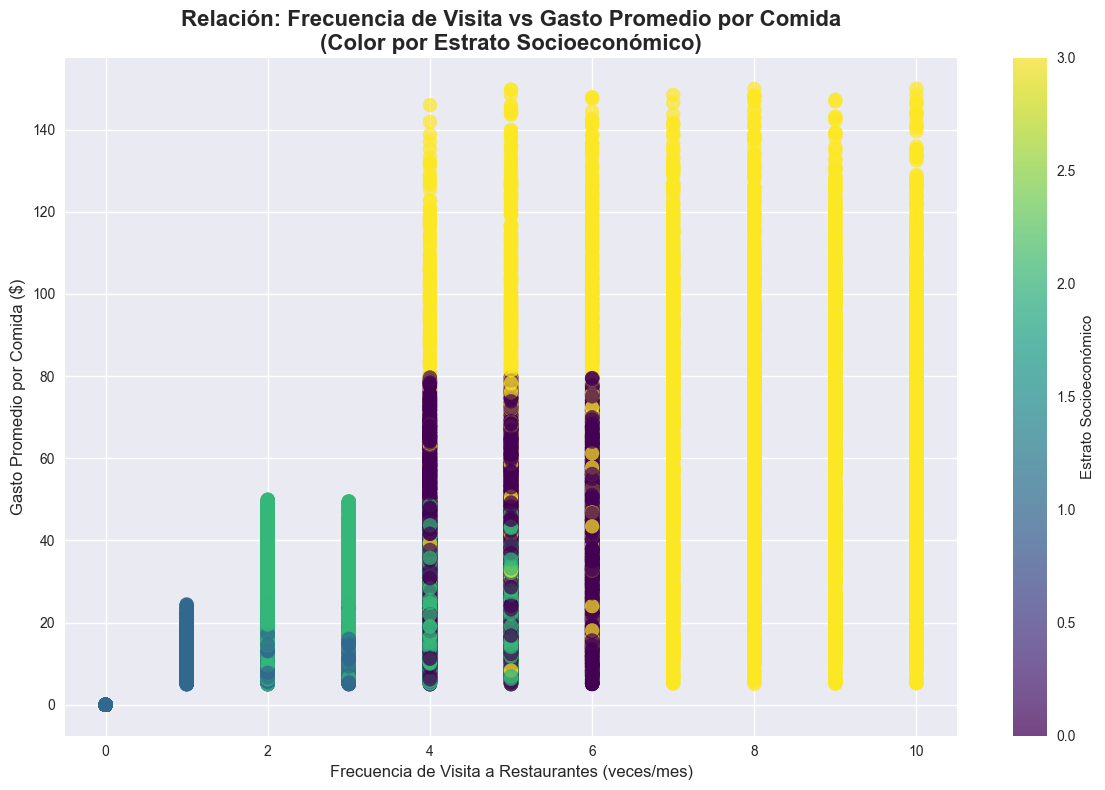

Análisis por estrato socioeconómico:
Estrato Alto: Correlación = 0.008
Estrato Bajo: Correlación = 0.611
Estrato Medio: Correlación = 0.010
Estrato Muy Alto: Correlación = 0.001


In [177]:
# Bloque 6: Gráfico - Relación frecuencia de visita vs gasto por estrato
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['frecuencia_visita'], 
                     df['promedio_gasto_comida'], 
                     c=df['estrato_socioeconomico'].astype('category').cat.codes,
                     cmap='viridis', alpha=0.7, s=100)

plt.colorbar(scatter, label='Estrato Socioeconómico')
plt.title('Relación: Frecuencia de Visita vs Gasto Promedio por Comida\n(Color por Estrato Socioeconómico)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia de Visita a Restaurantes (veces/mes)', fontsize=12)
plt.ylabel('Gasto Promedio por Comida ($)', fontsize=12)

plt.tight_layout()
plt.show()

# Análisis adicional por estrato
print("Análisis por estrato socioeconómico:")
for estrato in sorted(df['estrato_socioeconomico'].unique()):
    subset = df[df['estrato_socioeconomico'] == estrato]
    corr = subset['frecuencia_visita'].corr(subset['promedio_gasto_comida'])
    print(f"Estrato {estrato}: Correlación = {corr:.3f}")

# Bloque 7: Gráfico de Dispersión - Gasto Mensual vs Ingresos Mensuales

Exploramos la relación entre el gasto mensual en restaurantes y los ingresos mensuales de los clientes. Esto nos permite entender la capacidad de gasto en relación con los ingresos.

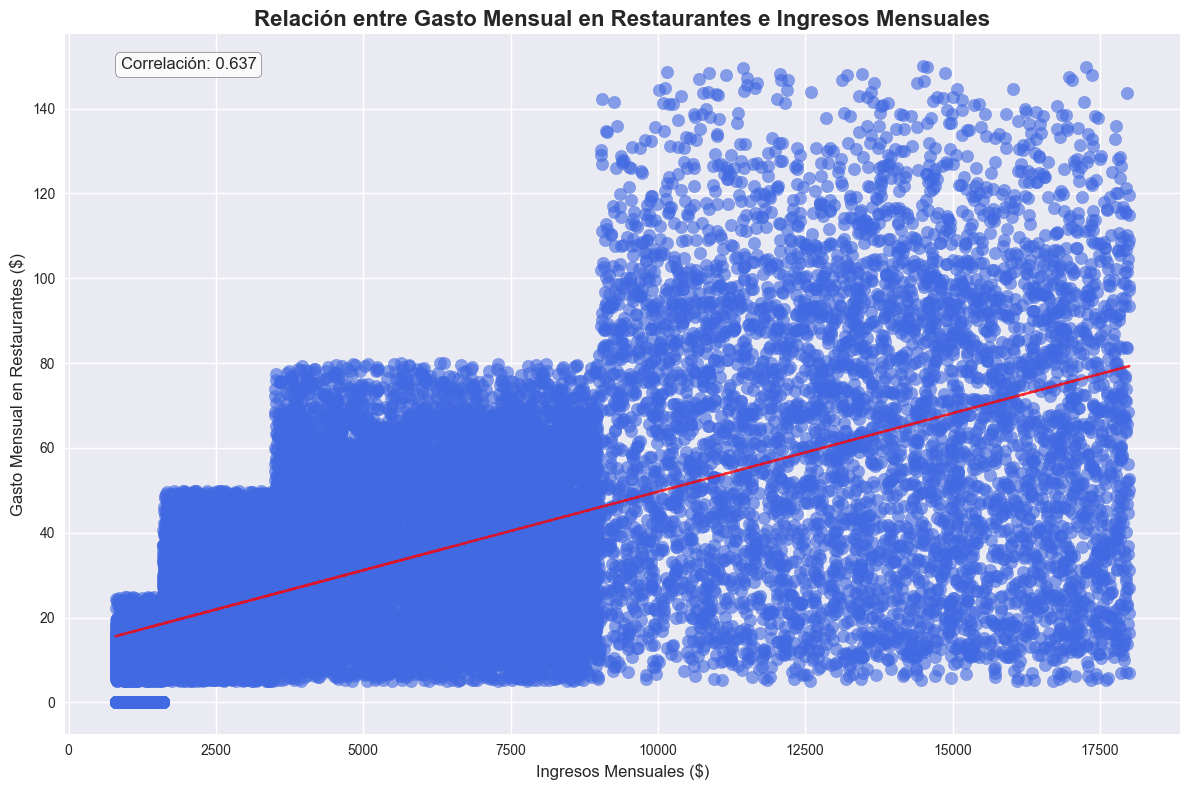

Correlación entre ingresos mensuales y gasto en restaurantes: 0.637


In [178]:
# Bloque 7: Gráfico de dispersión - Gasto mensual vs Ingresos mensuales
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['ingresos_mensuales'], df['promedio_gasto_comida'],
                     alpha=0.6, s=80, c='royalblue')

plt.title('Relación entre Gasto Mensual en Restaurantes e Ingresos Mensuales', 
          fontsize=16, fontweight='bold')
plt.xlabel('Ingresos Mensuales ($)', fontsize=12)
plt.ylabel('Gasto Mensual en Restaurantes ($)', fontsize=12)

# Calcular y mostrar línea de tendencia
z = np.polyfit(df['ingresos_mensuales'], df['promedio_gasto_comida'], 1)
p = np.poly1d(z)
plt.plot(df['ingresos_mensuales'], p(df['ingresos_mensuales']), "r--", alpha=0.8)

# Calcular correlación
correlation = df['ingresos_mensuales'].corr(df['promedio_gasto_comida'])
plt.text(0.05, 0.95, f'Correlación: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Correlación entre ingresos mensuales y gasto en restaurantes: {correlation:.3f}")

# Bloque 8: Distribución de Preferencias Alimenticias por Ciudad

Analizamos cómo se distribuyen las diferentes preferencias alimenticias across las distintas ciudades. Esto es esencial para personalizar ofertas y campañas de marketing.

<Figure size 1600x1000 with 0 Axes>

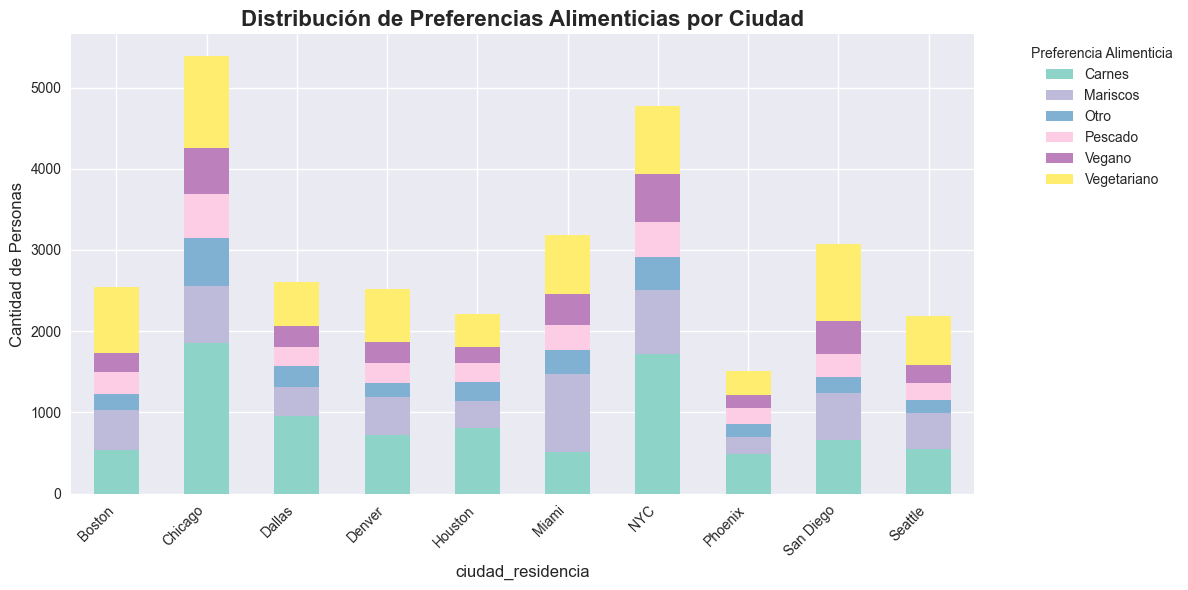

Distribución porcentual de preferencias por ciudad:

Miami:
  Vegetariano: 22.8%
  Mariscos: 30.3%
  Carnes: 16.0%
  Otro: 9.2%
  Pescado: 9.6%
  Vegano: 12.0%

Denver:
  Mariscos: 18.5%
  Vegetariano: 26.0%
  Carnes: 28.5%
  Pescado: 9.9%
  Vegano: 10.2%
  Otro: 6.8%

Boston:
  Carnes: 21.0%
  Vegetariano: 31.8%
  Mariscos: 19.4%
  Vegano: 9.4%
  Pescado: 10.7%
  Otro: 7.8%

San Diego:
  Carnes: 21.3%
  Vegetariano: 30.8%
  Pescado: 9.4%
  Mariscos: 19.0%
  Vegano: 13.2%
  Otro: 6.3%

Dallas:
  Carnes: 36.5%
  Pescado: 9.2%
  Vegano: 9.9%
  Vegetariano: 20.7%
  Otro: 9.6%
  Mariscos: 14.1%

NYC:
  Vegano: 12.3%
  Vegetariano: 17.6%
  Carnes: 35.9%
  Mariscos: 16.8%
  Otro: 8.3%
  Pescado: 9.1%

Seattle:
  Vegetariano: 28.0%
  Mariscos: 20.3%
  Pescado: 9.9%
  Carnes: 25.1%
  Vegano: 9.7%
  Otro: 7.0%

Chicago:
  Vegetariano: 20.9%
  Mariscos: 12.9%
  Carnes: 34.5%
  Pescado: 10.1%
  Vegano: 10.6%
  Otro: 11.0%

Houston:
  Vegano: 8.9%
  Vegetariano: 18.6%
  Otro: 10.8%
  Carnes: 36.3%

In [179]:
# Bloque 8: Distribución de preferencias alimenticias por ciudad
plt.figure(figsize=(16, 10))
preferencias_ciudad = pd.crosstab(df['ciudad_residencia'], df['preferencias_alimenticias'])

preferencias_ciudad.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Distribución de Preferencias Alimenticias por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('ciudad_residencia', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Preferencia Alimenticia', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Mostrar porcentajes por ciudad
print("Distribución porcentual de preferencias por ciudad:")
for ciudad in df['ciudad_residencia'].unique():
    subset = df[df['ciudad_residencia'] == ciudad]
    total = len(subset)
    print(f"\n{ciudad}:")
    for preferencia in subset['preferencias_alimenticias'].unique():
        count = len(subset[subset['preferencias_alimenticias'] == preferencia])
        porcentaje = (count / total) * 100
        print(f"  {preferencia}: {porcentaje:.1f}%")

# Bloque 9: Perfilamiento de Clientes de Mayor Gasto

Identificamos y analizamos el perfil de los clientes que más gastan en restaurantes. Entendemos sus preferencias, hábitos y características demográficas.

Umbral para clientes de alto gasto: $50.07
Número de clientes de alto gasto: 6000
Porcentaje del total: 20.0%


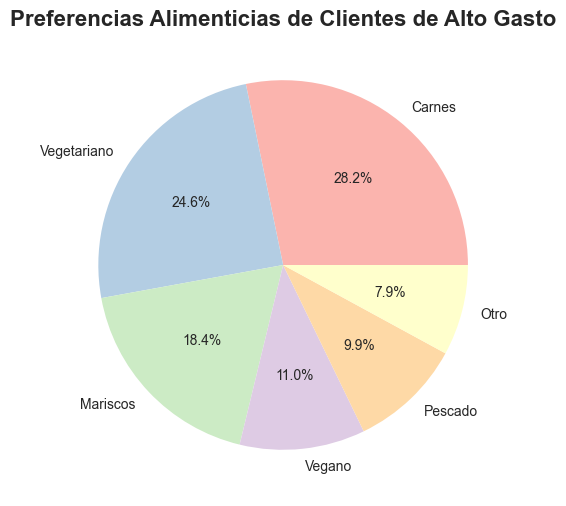


Estadísticas de gasto de clientes de alto gasto:
Gasto promedio mensual: $75.48
Gasto promedio por comida: $75.48
Frecuencia promedio de visita: 6.3 veces/mes


In [180]:
# Bloque 9: Perfilamiento de clientes de mayor gasto
# Identificar top 20% de clientes por gasto
umbral_gasto = df['promedio_gasto_comida'].quantile(0.8)
clientes_alto_gasto = df[df['promedio_gasto_comida'] >= umbral_gasto]

print(f"Umbral para clientes de alto gasto: ${umbral_gasto:.2f}")
print(f"Número de clientes de alto gasto: {len(clientes_alto_gasto)}")
print(f"Porcentaje del total: {(len(clientes_alto_gasto)/len(df))*100:.1f}%")

# Análisis de preferencias de clientes de alto gasto
plt.figure(figsize=(12, 6))
preferencias_alto_gasto = clientes_alto_gasto['preferencias_alimenticias'].value_counts()

plt.pie(preferencias_alto_gasto.values, labels=preferencias_alto_gasto.index,
        autopct='%1.1f%%', colors=plt.cm.Pastel1(np.arange(len(preferencias_alto_gasto))))
plt.title('Preferencias Alimenticias de Clientes de Alto Gasto', fontsize=16, fontweight='bold')
plt.show()

# Estadísticas de gasto de clientes premium
print("\nEstadísticas de gasto de clientes de alto gasto:")
print(f"Gasto promedio mensual: ${clientes_alto_gasto['promedio_gasto_comida'].mean():.2f}")
print(f"Gasto promedio por comida: ${clientes_alto_gasto['promedio_gasto_comida'].mean():.2f}")
print(f"Frecuencia promedio de visita: {clientes_alto_gasto['frecuencia_visita'].mean():.1f} veces/mes")

# Bloque 10: Ciudad con Más Membresías Premium

Identificamos en qué ciudad hay una mayor penetración de membresías premium, lo que indica lealtad del cliente y potencial para programas de fidelización.

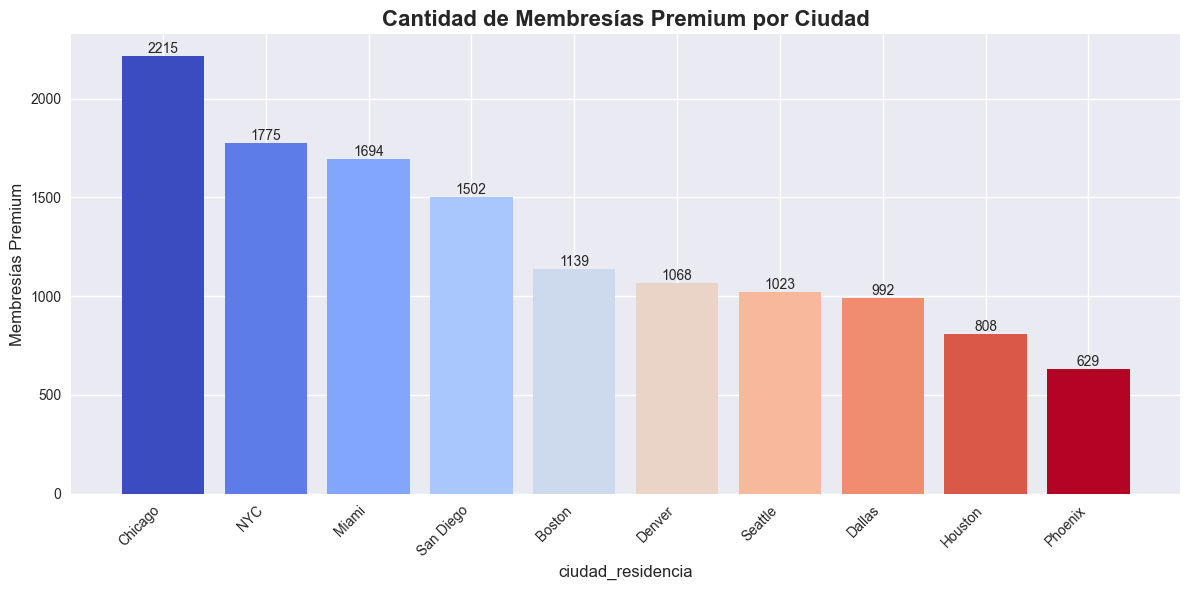

Membresías premium por ciudad:
Chicago: 2215 membresías (41.1% de la ciudad)
NYC: 1775 membresías (37.2% de la ciudad)
Miami: 1694 membresías (53.2% de la ciudad)
San Diego: 1502 membresías (48.8% de la ciudad)
Boston: 1139 membresías (44.7% de la ciudad)
Denver: 1068 membresías (42.3% de la ciudad)
Seattle: 1023 membresías (46.7% de la ciudad)
Dallas: 992 membresías (38.1% de la ciudad)
Houston: 808 membresías (36.5% de la ciudad)
Phoenix: 629 membresías (41.6% de la ciudad)


In [181]:
# Bloque 10: Ciudad con más membresías premium
plt.figure(figsize=(12, 6))
membresia_ciudad = df.groupby('ciudad_residencia')['membresia_premium'].apply(lambda x: (x == 'Sí').sum()).sort_values(ascending=False)

bars = plt.bar(membresia_ciudad.index, membresia_ciudad.values,
               color=plt.cm.coolwarm(np.linspace(0, 1, len(membresia_ciudad))))

plt.title('Cantidad de Membresías Premium por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('ciudad_residencia', fontsize=12)
plt.ylabel('Membresías Premium', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Membresías premium por ciudad:")
for ciudad, count in membresia_ciudad.items():
    total_ciudad = len(df[df['ciudad_residencia'] == ciudad])
    porcentaje = (count / total_ciudad) * 100
    print(f"{ciudad}: {count} membresías ({porcentaje:.1f}% de la ciudad)")

# Bloque 11: Relación entre Consumo de Alcohol y Edad

Investigamos cómo el consumo de alcohol en restaurantes varía según la edad de los clientes, lo que puede informar estrategias de marketing por grupos de edad.

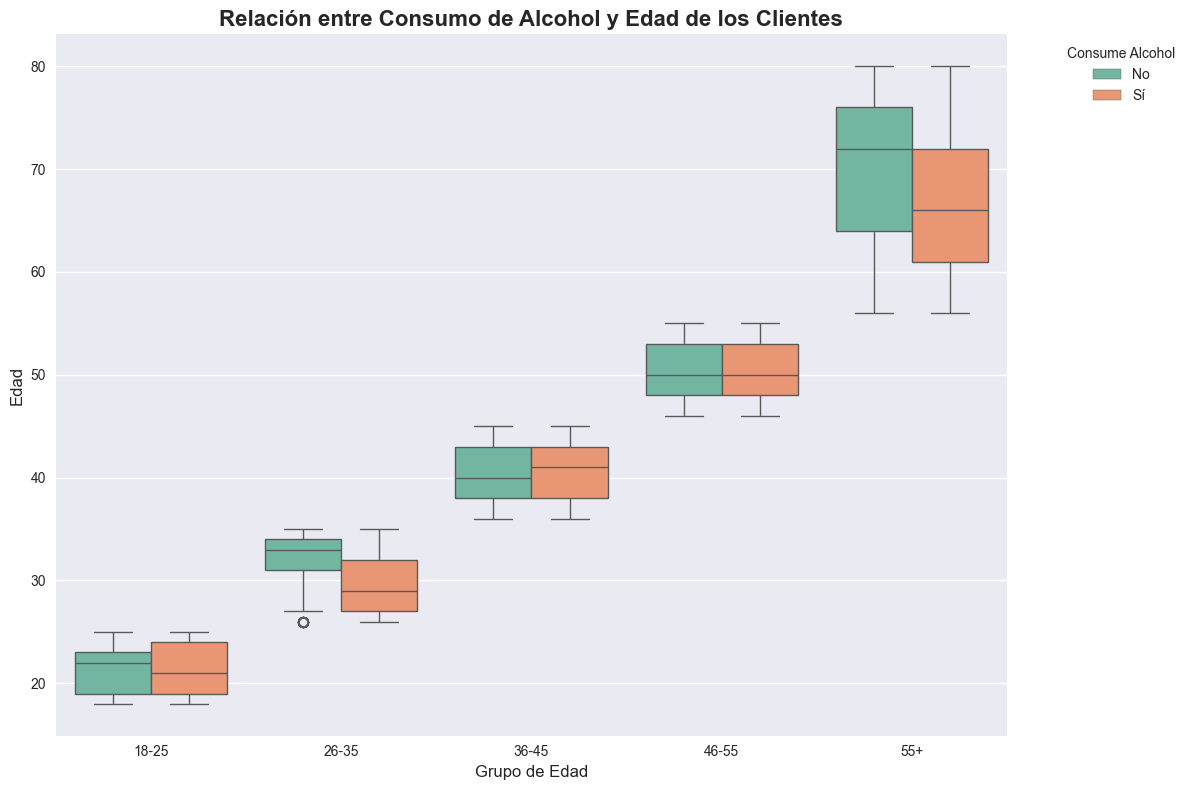

Distribución de consumo de alcohol por grupo de edad:
26-35: 70.6% consume alcohol
36-45: 50.2% consume alcohol
55+: 58.1% consume alcohol
46-55: 51.1% consume alcohol
18-25: 90.1% consume alcohol


In [182]:
# Bloque 11: Relación entre consumo de alcohol y edad
plt.figure(figsize=(12, 8))

# Crear boxplot por grupo de edad y consumo de alcohol
df['grupo_edad'] = pd.cut(df['edad'], bins=[0, 25, 35, 45, 55, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '55+'])

sns.boxplot(x='grupo_edad', y='edad', hue='consume_licor', data=df, palette='Set2')
plt.title('Relación entre Consumo de Alcohol y Edad de los Clientes', fontsize=16, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.legend(title='Consume Alcohol', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Análisis estadístico
print("Distribución de consumo de alcohol por grupo de edad:")
for grupo in df['grupo_edad'].unique():
    subset = df[df['grupo_edad'] == grupo]
    total = len(subset)
    consume = len(subset[subset['consume_licor'] == 'Sí'])
    porcentaje = (consume / total) * 100
    print(f"{grupo}: {porcentaje:.1f}% consume alcohol")

# Bloque 12: Documentación de Resultados y Conclusiones

Resumimos todos los hallazgos clave del análisis y proporcionamos recomendaciones estratégicas basadas en los insights obtenidos.

In [183]:
# Bloque 12: Documentación de resultados y conclusiones
print("=" * 60)
print("DOCUMENTACIÓN DE RESULTADOS - ANÁLISIS COMPLETO")
print("=" * 60)

# 1. Resumen general
print("\n1. RESUMEN GENERAL DEL DATASET")
print(f"• Total de registros: {len(df)}")
print(f"• Ciudades analizadas: {len(df['ciudad_residencia'].unique())}")
print(f"• Rango de edad: {df['edad'].min()} - {df['edad'].max()} años")
print(f"• Gasto mensual promedio: ${df['promedio_gasto_comida'].mean():.2f}")

# 2. Hallazgos principales
print("\n2. HALLAZGOS PRINCIPALES")

# Distribución geográfica
ciudad_mas_poblada = df['ciudad_residencia'].value_counts().index[0]
print(f"• Ciudad más poblada: {ciudad_mas_poblada}")

# Estrato predominante
estrato_predominante = df['estrato_socioeconomico'].value_counts().index[0]
print(f"• Estrato predominante: {estrato_predominante}")

# Ciudad con mayor gasto
ciudad_mayor_gasto = df.groupby('ciudad_residencia')['promedio_gasto_comida'].mean().idxmax()
gasto_max = df.groupby('ciudad_residencia')['promedio_gasto_comida'].mean().max()
print(f"• Ciudad con mayor gasto promedio: {ciudad_mayor_gasto} (${gasto_max:.2f})")

# Relación ingresos-gasto
correlacion = df['ingresos_mensuales'].corr(df['promedio_gasto_comida'])
print(f"• Correlación ingresos-gasto: {correlacion:.3f}")

# Membresías premium
ciudad_mas_membresias = df.groupby('ciudad_residencia')['membresia_premium'].apply(lambda x: (x == 'Sí').sum()).idxmax()
print(f"• Ciudad con más membresías premium: {ciudad_mas_membresias}")

# 3. Insights para marketing
print("\n3. INSIGHTS PARA ESTRATEGIAS DE MARKETING")
print("• Segmentar campañas por preferencias alimenticias dominantes en cada ciudad")
print("• Enfocar ofertas premium en ciudades con mayor poder adquisitivo")
print("• Desarrollar promociones específicas para grupos de edad que más consumen alcohol")
print("• Crear programas de fidelización en ciudades con alta frecuencia de visita")

# 4. Recomendaciones
print("\n4. RECOMENDACIONES ESTRATÉGICAS")
print("• Priorizar inversión en marketing en:", ciudad_mayor_gasto)
print("• Desarrollar campañas específicas para estrato:", estrato_predominante)
print("• Crear alianzas con restaurantes que coincidan con preferencias mayoritarias")
print("• Implementar programas de membresía en ciudades con menor penetración actual")

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)

DOCUMENTACIÓN DE RESULTADOS - ANÁLISIS COMPLETO

1. RESUMEN GENERAL DEL DATASET
• Total de registros: 30000
• Ciudades analizadas: 10
• Rango de edad: 18 - 80 años
• Gasto mensual promedio: $32.60

2. HALLAZGOS PRINCIPALES
• Ciudad más poblada: Chicago
• Estrato predominante: Medio
• Ciudad con mayor gasto promedio: Miami ($39.82)
• Correlación ingresos-gasto: 0.637
• Ciudad con más membresías premium: Chicago

3. INSIGHTS PARA ESTRATEGIAS DE MARKETING
• Segmentar campañas por preferencias alimenticias dominantes en cada ciudad
• Enfocar ofertas premium en ciudades con mayor poder adquisitivo
• Desarrollar promociones específicas para grupos de edad que más consumen alcohol
• Crear programas de fidelización en ciudades con alta frecuencia de visita

4. RECOMENDACIONES ESTRATÉGICAS
• Priorizar inversión en marketing en: Miami
• Desarrollar campañas específicas para estrato: Medio
• Crear alianzas con restaurantes que coincidan con preferencias mayoritarias
• Implementar programas de mem